<h1>C4 Solution</h1>

<h3>Install and import</h3>

In [ ]:
# %%capture
import sys
!{sys.executable} -m pip install smdebug torch torchvision tqdm

In [1]:
import os
import boto3
import sagemaker
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.debugger import Rule, DebuggerHookConfig, TensorBoardOutputConfig, CollectionConfig, ProfilerRule, rule_configs, ProfilerConfig, FrameworkProfile
from sagemaker.analytics import HyperparameterTuningJobAnalytics

<h3>Get the data and copy it to S3</h3>

In [3]:
# %%capture
# !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
# !unzip dogImages.zip
!aws s3 cp dogImages s3://oscar-udacity-project-operationalizing/ --recursive

upload: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg to s3://oscar-udacity-project-operationalizing/test/001.Affenpinscher/Affenpinscher_00003.jpg
upload: dogImages/test/002.Afghan_hound/Afghan_hound_00125.jpg to s3://oscar-udacity-project-operationalizing/test/002.Afghan_hound/Afghan_hound_00125.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg to s3://oscar-udacity-project-operationalizing/test/001.Affenpinscher/Affenpinscher_00036.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg to s3://oscar-udacity-project-operationalizing/test/001.Affenpinscher/Affenpinscher_00023.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg to s3://oscar-udacity-project-operationalizing/test/001.Affenpinscher/Affenpinscher_00071.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg to s3://oscar-udacity-project-operationalizing/test/001.Affenpinscher/Affenpinscher_00047.jpg
upload: dogImages/test/002.Afghan_hound/Afghan_hou

upload: dogImages/test/008.American_staffordshire_terrier/American_staffordshire_terrier_00540.jpg to s3://oscar-udacity-project-operationalizing/test/008.American_staffordshire_terrier/American_staffordshire_terrier_00540.jpg
upload: dogImages/test/007.American_foxhound/American_foxhound_00524.jpg to s3://oscar-udacity-project-operationalizing/test/007.American_foxhound/American_foxhound_00524.jpg
upload: dogImages/test/007.American_foxhound/American_foxhound_00519.jpg to s3://oscar-udacity-project-operationalizing/test/007.American_foxhound/American_foxhound_00519.jpg
upload: dogImages/test/007.American_foxhound/American_foxhound_00535.jpg to s3://oscar-udacity-project-operationalizing/test/007.American_foxhound/American_foxhound_00535.jpg
upload: dogImages/test/006.American_eskimo_dog/American_eskimo_dog_00467.jpg to s3://oscar-udacity-project-operationalizing/test/006.American_eskimo_dog/American_eskimo_dog_00467.jpg
upload: dogImages/test/007.American_foxhound/American_foxhound_00

upload: dogImages/test/013.Australian_terrier/Australian_terrier_00900.jpg to s3://oscar-udacity-project-operationalizing/test/013.Australian_terrier/Australian_terrier_00900.jpg
upload: dogImages/test/014.Basenji/Basenji_00987.jpg to s3://oscar-udacity-project-operationalizing/test/014.Basenji/Basenji_00987.jpg
upload: dogImages/test/014.Basenji/Basenji_00959.jpg to s3://oscar-udacity-project-operationalizing/test/014.Basenji/Basenji_00959.jpg
upload: dogImages/test/014.Basenji/Basenji_00955.jpg to s3://oscar-udacity-project-operationalizing/test/014.Basenji/Basenji_00955.jpg
upload: dogImages/test/015.Basset_hound/Basset_hound_01034.jpg to s3://oscar-udacity-project-operationalizing/test/015.Basset_hound/Basset_hound_01034.jpg
upload: dogImages/test/013.Australian_terrier/Australian_terrier_00897.jpg to s3://oscar-udacity-project-operationalizing/test/013.Australian_terrier/Australian_terrier_00897.jpg
upload: dogImages/test/014.Basenji/Basenji_00978.jpg to s3://oscar-udacity-project

upload: dogImages/test/021.Belgian_sheepdog/Belgian_sheepdog_01491.jpg to s3://oscar-udacity-project-operationalizing/test/021.Belgian_sheepdog/Belgian_sheepdog_01491.jpg
upload: dogImages/test/021.Belgian_sheepdog/Belgian_sheepdog_01540.jpg to s3://oscar-udacity-project-operationalizing/test/021.Belgian_sheepdog/Belgian_sheepdog_01540.jpg
upload: dogImages/test/021.Belgian_sheepdog/Belgian_sheepdog_01486.jpg to s3://oscar-udacity-project-operationalizing/test/021.Belgian_sheepdog/Belgian_sheepdog_01486.jpg
upload: dogImages/test/021.Belgian_sheepdog/Belgian_sheepdog_01554.jpg to s3://oscar-udacity-project-operationalizing/test/021.Belgian_sheepdog/Belgian_sheepdog_01554.jpg
upload: dogImages/test/021.Belgian_sheepdog/Belgian_sheepdog_01482.jpg to s3://oscar-udacity-project-operationalizing/test/021.Belgian_sheepdog/Belgian_sheepdog_01482.jpg
upload: dogImages/test/021.Belgian_sheepdog/Belgian_sheepdog_01488.jpg to s3://oscar-udacity-project-operationalizing/test/021.Belgian_sheepdog/B

upload: dogImages/test/029.Border_collie/Border_collie_02051.jpg to s3://oscar-udacity-project-operationalizing/test/029.Border_collie/Border_collie_02051.jpg
upload: dogImages/test/029.Border_collie/Border_collie_02056.jpg to s3://oscar-udacity-project-operationalizing/test/029.Border_collie/Border_collie_02056.jpg
upload: dogImages/test/029.Border_collie/Border_collie_02053.jpg to s3://oscar-udacity-project-operationalizing/test/029.Border_collie/Border_collie_02053.jpg
upload: dogImages/test/029.Border_collie/Border_collie_02006.jpg to s3://oscar-udacity-project-operationalizing/test/029.Border_collie/Border_collie_02006.jpg
upload: dogImages/test/029.Border_collie/Border_collie_01997.jpg to s3://oscar-udacity-project-operationalizing/test/029.Border_collie/Border_collie_01997.jpg
upload: dogImages/test/027.Bloodhound/Bloodhound_01921.jpg to s3://oscar-udacity-project-operationalizing/test/027.Bloodhound/Bloodhound_01921.jpg
upload: dogImages/test/030.Border_terrier/Border_terrier_0

upload: dogImages/test/035.Boykin_spaniel/Boykin_spaniel_02501.jpg to s3://oscar-udacity-project-operationalizing/test/035.Boykin_spaniel/Boykin_spaniel_02501.jpg
upload: dogImages/test/036.Briard/Briard_02560.jpg to s3://oscar-udacity-project-operationalizing/test/036.Briard/Briard_02560.jpg
upload: dogImages/test/036.Briard/Briard_02542.jpg to s3://oscar-udacity-project-operationalizing/test/036.Briard/Briard_02542.jpg
upload: dogImages/test/037.Brittany/Brittany_02591.jpg to s3://oscar-udacity-project-operationalizing/test/037.Brittany/Brittany_02591.jpg
upload: dogImages/test/037.Brittany/Brittany_02607.jpg to s3://oscar-udacity-project-operationalizing/test/037.Brittany/Brittany_02607.jpg
upload: dogImages/test/036.Briard/Briard_02540.jpg to s3://oscar-udacity-project-operationalizing/test/036.Briard/Briard_02540.jpg
upload: dogImages/test/037.Brittany/Brittany_02648.jpg to s3://oscar-udacity-project-operationalizing/test/037.Brittany/Brittany_02648.jpg
upload: dogImages/test/036.

upload: dogImages/test/042.Cairn_terrier/Cairn_terrier_03010.jpg to s3://oscar-udacity-project-operationalizing/test/042.Cairn_terrier/Cairn_terrier_03010.jpg
upload: dogImages/test/044.Cane_corso/Cane_corso_03147.jpg to s3://oscar-udacity-project-operationalizing/test/044.Cane_corso/Cane_corso_03147.jpg
upload: dogImages/test/044.Cane_corso/Cane_corso_03114.jpg to s3://oscar-udacity-project-operationalizing/test/044.Cane_corso/Cane_corso_03114.jpg
upload: dogImages/test/044.Cane_corso/Cane_corso_03117.jpg to s3://oscar-udacity-project-operationalizing/test/044.Cane_corso/Cane_corso_03117.jpg
upload: dogImages/test/043.Canaan_dog/Canaan_dog_03084.jpg to s3://oscar-udacity-project-operationalizing/test/043.Canaan_dog/Canaan_dog_03084.jpg
upload: dogImages/test/041.Bullmastiff/Bullmastiff_02929.jpg to s3://oscar-udacity-project-operationalizing/test/041.Bullmastiff/Bullmastiff_02929.jpg
upload: dogImages/test/044.Cane_corso/Cane_corso_03110.jpg to s3://oscar-udacity-project-operationaliz

upload: dogImages/test/051.Chow_chow/Chow_chow_03637.jpg to s3://oscar-udacity-project-operationalizing/test/051.Chow_chow/Chow_chow_03637.jpg
upload: dogImages/test/051.Chow_chow/Chow_chow_03608.jpg to s3://oscar-udacity-project-operationalizing/test/051.Chow_chow/Chow_chow_03608.jpg
upload: dogImages/test/051.Chow_chow/Chow_chow_03654.jpg to s3://oscar-udacity-project-operationalizing/test/051.Chow_chow/Chow_chow_03654.jpg
upload: dogImages/test/051.Chow_chow/Chow_chow_03592.jpg to s3://oscar-udacity-project-operationalizing/test/051.Chow_chow/Chow_chow_03592.jpg
upload: dogImages/test/050.Chinese_shar-pei/Chinese_shar-pei_03556.jpg to s3://oscar-udacity-project-operationalizing/test/050.Chinese_shar-pei/Chinese_shar-pei_03556.jpg
upload: dogImages/test/049.Chinese_crested/Chinese_crested_03490.jpg to s3://oscar-udacity-project-operationalizing/test/049.Chinese_crested/Chinese_crested_03490.jpg
upload: dogImages/test/051.Chow_chow/Chow_chow_03660.jpg to s3://oscar-udacity-project-ope

upload: dogImages/test/057.Dalmatian/Dalmatian_04076.jpg to s3://oscar-udacity-project-operationalizing/test/057.Dalmatian/Dalmatian_04076.jpg
upload: dogImages/test/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04152.jpg to s3://oscar-udacity-project-operationalizing/test/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04152.jpg
upload: dogImages/test/059.Doberman_pinscher/Doberman_pinscher_04177.jpg to s3://oscar-udacity-project-operationalizing/test/059.Doberman_pinscher/Doberman_pinscher_04177.jpg
upload: dogImages/test/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04142.jpg to s3://oscar-udacity-project-operationalizing/test/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04142.jpg
upload: dogImages/test/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04155.jpg to s3://oscar-udacity-project-operationalizing/test/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04155.jpg
upload: dogImages/test/059.Doberman_pinscher/Doberman_pinscher_04169.jpg to s3://oscar-udacity-pr

upload: dogImages/test/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04258.jpg to s3://oscar-udacity-project-operationalizing/test/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04258.jpg
upload: dogImages/test/067.Finnish_spitz/Finnish_spitz_04651.jpg to s3://oscar-udacity-project-operationalizing/test/067.Finnish_spitz/Finnish_spitz_04651.jpg
upload: dogImages/test/066.Field_spaniel/Field_spaniel_04616.jpg to s3://oscar-udacity-project-operationalizing/test/066.Field_spaniel/Field_spaniel_04616.jpg
upload: dogImages/test/067.Finnish_spitz/Finnish_spitz_04661.jpg to s3://oscar-udacity-project-operationalizing/test/067.Finnish_spitz/Finnish_spitz_04661.jpg
upload: dogImages/test/067.Finnish_spitz/Finnish_spitz_04680.jpg to s3://oscar-udacity-project-operationalizing/test/067.Finnish_spitz/Finnish_spitz_04680.jpg
upload: dogImages/test/068.Flat-coated_retriever/Flat-coated_retriever_04703.jpg to s3://oscar-udacity-project-operationalizing/test/068.Flat-coated_retriever/Flat-coated_retriever_04703.jp

upload: dogImages/test/074.Giant_schnauzer/Giant_schnauzer_05120.jpg to s3://oscar-udacity-project-operationalizing/test/074.Giant_schnauzer/Giant_schnauzer_05120.jpg
upload: dogImages/test/072.German_shorthaired_pointer/German_shorthaired_pointer_04971.jpg to s3://oscar-udacity-project-operationalizing/test/072.German_shorthaired_pointer/German_shorthaired_pointer_04971.jpg
upload: dogImages/test/074.Giant_schnauzer/Giant_schnauzer_05104.jpg to s3://oscar-udacity-project-operationalizing/test/074.Giant_schnauzer/Giant_schnauzer_05104.jpg
upload: dogImages/test/073.German_wirehaired_pointer/German_wirehaired_pointer_05064.jpg to s3://oscar-udacity-project-operationalizing/test/073.German_wirehaired_pointer/German_wirehaired_pointer_05064.jpg
upload: dogImages/test/070.German_pinscher/German_pinscher_04875.jpg to s3://oscar-udacity-project-operationalizing/test/070.German_pinscher/German_pinscher_04875.jpg
upload: dogImages/test/073.German_wirehaired_pointer/German_wirehaired_pointer_05

upload: dogImages/test/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05473.jpg to s3://oscar-udacity-project-operationalizing/test/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05473.jpg
upload: dogImages/test/081.Greyhound/Greyhound_05542.jpg to s3://oscar-udacity-project-operationalizing/test/081.Greyhound/Greyhound_05542.jpg
upload: dogImages/test/081.Greyhound/Greyhound_05560.jpg to s3://oscar-udacity-project-operationalizing/test/081.Greyhound/Greyhound_05560.jpg
upload: dogImages/test/081.Greyhound/Greyhound_05565.jpg to s3://oscar-udacity-project-operationalizing/test/081.Greyhound/Greyhound_05565.jpg
upload: dogImages/test/082.Havanese/Havanese_05614.jpg to s3://oscar-udacity-project-operationalizing/test/082.Havanese/Havanese_05614.jpg
upload: dogImages/test/082.Havanese/Havanese_05631.jpg to s3://oscar-udacity-project-operationalizing/test/082.Havanese/Havanese_05631.jpg
upload: dogImages/test/083.Ibizan_hound/Ibizan_hound_05679.jpg to s3://oscar-udaci

upload: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06052.jpg to s3://oscar-udacity-project-operationalizing/test/089.Irish_wolfhound/Irish_wolfhound_06052.jpg
upload: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06022.jpg to s3://oscar-udacity-project-operationalizing/test/089.Irish_wolfhound/Irish_wolfhound_06022.jpg
upload: dogImages/test/090.Italian_greyhound/Italian_greyhound_06114.jpg to s3://oscar-udacity-project-operationalizing/test/090.Italian_greyhound/Italian_greyhound_06114.jpg
upload: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06063.jpg to s3://oscar-udacity-project-operationalizing/test/089.Irish_wolfhound/Irish_wolfhound_06063.jpg
upload: dogImages/test/090.Italian_greyhound/Italian_greyhound_06146.jpg to s3://oscar-udacity-project-operationalizing/test/090.Italian_greyhound/Italian_greyhound_06146.jpg
upload: dogImages/test/088.Irish_water_spaniel/Irish_water_spaniel_06011.jpg to s3://oscar-udacity-project-operationalizing/test/088.Irish_water_span

upload: dogImages/test/099.Lhasa_apso/Lhasa_apso_06619.jpg to s3://oscar-udacity-project-operationalizing/test/099.Lhasa_apso/Lhasa_apso_06619.jpg
upload: dogImages/test/098.Leonberger/Leonberger_06566.jpg to s3://oscar-udacity-project-operationalizing/test/098.Leonberger/Leonberger_06566.jpg
upload: dogImages/test/098.Leonberger/Leonberger_06609.jpg to s3://oscar-udacity-project-operationalizing/test/098.Leonberger/Leonberger_06609.jpg
upload: dogImages/test/099.Lhasa_apso/Lhasa_apso_06651.jpg to s3://oscar-udacity-project-operationalizing/test/099.Lhasa_apso/Lhasa_apso_06651.jpg
upload: dogImages/test/099.Lhasa_apso/Lhasa_apso_06620.jpg to s3://oscar-udacity-project-operationalizing/test/099.Lhasa_apso/Lhasa_apso_06620.jpg
upload: dogImages/test/099.Lhasa_apso/Lhasa_apso_06668.jpg to s3://oscar-udacity-project-operationalizing/test/099.Lhasa_apso/Lhasa_apso_06668.jpg
upload: dogImages/test/099.Lhasa_apso/Lhasa_apso_06666.jpg to s3://oscar-udacity-project-operationalizing/test/099.Lha

upload: dogImages/test/110.Norwegian_lundehund/Norwegian_lundehund_07183.jpg to s3://oscar-udacity-project-operationalizing/test/110.Norwegian_lundehund/Norwegian_lundehund_07183.jpg
upload: dogImages/test/109.Norwegian_elkhound/Norwegian_elkhound_07137.jpg to s3://oscar-udacity-project-operationalizing/test/109.Norwegian_elkhound/Norwegian_elkhound_07137.jpg
upload: dogImages/test/109.Norwegian_elkhound/Norwegian_elkhound_07163.jpg to s3://oscar-udacity-project-operationalizing/test/109.Norwegian_elkhound/Norwegian_elkhound_07163.jpg
upload: dogImages/test/108.Norwegian_buhund/Norwegian_buhund_07111.jpg to s3://oscar-udacity-project-operationalizing/test/108.Norwegian_buhund/Norwegian_buhund_07111.jpg
upload: dogImages/test/107.Norfolk_terrier/Norfolk_terrier_07054.jpg to s3://oscar-udacity-project-operationalizing/test/107.Norfolk_terrier/Norfolk_terrier_07054.jpg
upload: dogImages/test/109.Norwegian_elkhound/Norwegian_elkhound_07170.jpg to s3://oscar-udacity-project-operationalizing

upload: dogImages/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07658.jpg to s3://oscar-udacity-project-operationalizing/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07658.jpg
upload: dogImages/test/117.Pekingese/Pekingese_07558.jpg to s3://oscar-udacity-project-operationalizing/test/117.Pekingese/Pekingese_07558.jpg
upload: dogImages/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07672.jpg to s3://oscar-udacity-project-operationalizing/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07672.jpg
upload: dogImages/test/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07691.jpg to s3://oscar-udacity-project-operationalizing/test/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07691.jpg
upload: dogImages/test/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07715.jpg to s3://oscar-udacity-project-operationalizing/test/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07715.jpg
upload: dogImages/test/119.Petit_basset_griff

upload: dogImages/test/129.Tibetan_mastiff/Tibetan_mastiff_08158.jpg to s3://oscar-udacity-project-operationalizing/test/129.Tibetan_mastiff/Tibetan_mastiff_08158.jpg
upload: dogImages/test/129.Tibetan_mastiff/Tibetan_mastiff_08140.jpg to s3://oscar-udacity-project-operationalizing/test/129.Tibetan_mastiff/Tibetan_mastiff_08140.jpg
upload: dogImages/test/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08267.jpg to s3://oscar-udacity-project-operationalizing/test/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08267.jpg
upload: dogImages/test/129.Tibetan_mastiff/Tibetan_mastiff_08138.jpg to s3://oscar-udacity-project-operationalizing/test/129.Tibetan_mastiff/Tibetan_mastiff_08138.jpg
upload: dogImages/test/129.Tibetan_mastiff/Tibetan_mastiff_08156.jpg to s3://oscar-udacity-project-operationalizing/test/129.Tibetan_mastiff/Tibetan_mastiff_08156.jpg
upload: dogImages/test/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08190.jpg to s3://oscar-udacity-project-oper

upload: dogImages/train/001.Affenpinscher/Affenpinscher_00053.jpg to s3://oscar-udacity-project-operationalizing/train/001.Affenpinscher/Affenpinscher_00053.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00050.jpg to s3://oscar-udacity-project-operationalizing/train/001.Affenpinscher/Affenpinscher_00050.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00051.jpg to s3://oscar-udacity-project-operationalizing/train/001.Affenpinscher/Affenpinscher_00051.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00054.jpg to s3://oscar-udacity-project-operationalizing/train/001.Affenpinscher/Affenpinscher_00054.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00043.jpg to s3://oscar-udacity-project-operationalizing/train/001.Affenpinscher/Affenpinscher_00043.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00060.jpg to s3://oscar-udacity-project-operationalizing/train/001.Affenpinscher/Affenpinscher_00060.jpg
upload: dogImages/train/001.Affenp

upload: dogImages/train/002.Afghan_hound/Afghan_hound_00119.jpg to s3://oscar-udacity-project-operationalizing/train/002.Afghan_hound/Afghan_hound_00119.jpg
upload: dogImages/train/002.Afghan_hound/Afghan_hound_00118.jpg to s3://oscar-udacity-project-operationalizing/train/002.Afghan_hound/Afghan_hound_00118.jpg
upload: dogImages/train/002.Afghan_hound/Afghan_hound_00108.jpg to s3://oscar-udacity-project-operationalizing/train/002.Afghan_hound/Afghan_hound_00108.jpg
upload: dogImages/train/002.Afghan_hound/Afghan_hound_00114.jpg to s3://oscar-udacity-project-operationalizing/train/002.Afghan_hound/Afghan_hound_00114.jpg
upload: dogImages/train/002.Afghan_hound/Afghan_hound_00122.jpg to s3://oscar-udacity-project-operationalizing/train/002.Afghan_hound/Afghan_hound_00122.jpg
upload: dogImages/train/002.Afghan_hound/Afghan_hound_00123.jpg to s3://oscar-udacity-project-operationalizing/train/002.Afghan_hound/Afghan_hound_00123.jpg
upload: dogImages/train/002.Afghan_hound/Afghan_hound_0012

upload: dogImages/train/003.Airedale_terrier/Airedale_terrier_00171.jpg to s3://oscar-udacity-project-operationalizing/train/003.Airedale_terrier/Airedale_terrier_00171.jpg
upload: dogImages/train/003.Airedale_terrier/Airedale_terrier_00186.jpg to s3://oscar-udacity-project-operationalizing/train/003.Airedale_terrier/Airedale_terrier_00186.jpg
upload: dogImages/train/003.Airedale_terrier/Airedale_terrier_00192.jpg to s3://oscar-udacity-project-operationalizing/train/003.Airedale_terrier/Airedale_terrier_00192.jpg
upload: dogImages/train/003.Airedale_terrier/Airedale_terrier_00191.jpg to s3://oscar-udacity-project-operationalizing/train/003.Airedale_terrier/Airedale_terrier_00191.jpg
upload: dogImages/train/003.Airedale_terrier/Airedale_terrier_00195.jpg to s3://oscar-udacity-project-operationalizing/train/003.Airedale_terrier/Airedale_terrier_00195.jpg
upload: dogImages/train/003.Airedale_terrier/Airedale_terrier_00193.jpg to s3://oscar-udacity-project-operationalizing/train/003.Aireda

upload: dogImages/train/004.Akita/Akita_00248.jpg to s3://oscar-udacity-project-operationalizing/train/004.Akita/Akita_00248.jpg
upload: dogImages/train/004.Akita/Akita_00253.jpg to s3://oscar-udacity-project-operationalizing/train/004.Akita/Akita_00253.jpg
upload: dogImages/train/004.Akita/Akita_00251.jpg to s3://oscar-udacity-project-operationalizing/train/004.Akita/Akita_00251.jpg
upload: dogImages/train/004.Akita/Akita_00255.jpg to s3://oscar-udacity-project-operationalizing/train/004.Akita/Akita_00255.jpg
upload: dogImages/train/004.Akita/Akita_00269.jpg to s3://oscar-udacity-project-operationalizing/train/004.Akita/Akita_00269.jpg
upload: dogImages/train/004.Akita/Akita_00260.jpg to s3://oscar-udacity-project-operationalizing/train/004.Akita/Akita_00260.jpg
upload: dogImages/train/004.Akita/Akita_00254.jpg to s3://oscar-udacity-project-operationalizing/train/004.Akita/Akita_00254.jpg
upload: dogImages/train/004.Akita/Akita_00272.jpg to s3://oscar-udacity-project-operationalizing/

upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00338.jpg to s3://oscar-udacity-project-operationalizing/train/005.Alaskan_malamute/Alaskan_malamute_00338.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00329.jpg to s3://oscar-udacity-project-operationalizing/train/005.Alaskan_malamute/Alaskan_malamute_00329.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00334.jpg to s3://oscar-udacity-project-operationalizing/train/005.Alaskan_malamute/Alaskan_malamute_00334.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00331.jpg to s3://oscar-udacity-project-operationalizing/train/005.Alaskan_malamute/Alaskan_malamute_00331.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00335.jpg to s3://oscar-udacity-project-operationalizing/train/005.Alaskan_malamute/Alaskan_malamute_00335.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00340.jpg to s3://oscar-udacity-project-operationalizing/train/005.Alaska

upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00394.jpg to s3://oscar-udacity-project-operationalizing/train/006.American_eskimo_dog/American_eskimo_dog_00394.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00391.jpg to s3://oscar-udacity-project-operationalizing/train/005.Alaskan_malamute/Alaskan_malamute_00391.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00393.jpg to s3://oscar-udacity-project-operationalizing/train/005.Alaskan_malamute/Alaskan_malamute_00393.jpg
upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00395.jpg to s3://oscar-udacity-project-operationalizing/train/006.American_eskimo_dog/American_eskimo_dog_00395.jpg
upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00397.jpg to s3://oscar-udacity-project-operationalizing/train/006.American_eskimo_dog/American_eskimo_dog_00397.jpg
upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00399.jpg to s3://oscar-udacity

upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00459.jpg to s3://oscar-udacity-project-operationalizing/train/006.American_eskimo_dog/American_eskimo_dog_00459.jpg
upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00453.jpg to s3://oscar-udacity-project-operationalizing/train/006.American_eskimo_dog/American_eskimo_dog_00453.jpg
upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00450.jpg to s3://oscar-udacity-project-operationalizing/train/006.American_eskimo_dog/American_eskimo_dog_00450.jpg
upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00462.jpg to s3://oscar-udacity-project-operationalizing/train/006.American_eskimo_dog/American_eskimo_dog_00462.jpg
upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00443.jpg to s3://oscar-udacity-project-operationalizing/train/006.American_eskimo_dog/American_eskimo_dog_00443.jpg
upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00461.j

upload: dogImages/train/007.American_foxhound/American_foxhound_00517.jpg to s3://oscar-udacity-project-operationalizing/train/007.American_foxhound/American_foxhound_00517.jpg
upload: dogImages/train/007.American_foxhound/American_foxhound_00496.jpg to s3://oscar-udacity-project-operationalizing/train/007.American_foxhound/American_foxhound_00496.jpg
upload: dogImages/train/007.American_foxhound/American_foxhound_00510.jpg to s3://oscar-udacity-project-operationalizing/train/007.American_foxhound/American_foxhound_00510.jpg
upload: dogImages/train/007.American_foxhound/American_foxhound_00520.jpg to s3://oscar-udacity-project-operationalizing/train/007.American_foxhound/American_foxhound_00520.jpg
upload: dogImages/train/007.American_foxhound/American_foxhound_00514.jpg to s3://oscar-udacity-project-operationalizing/train/007.American_foxhound/American_foxhound_00514.jpg
upload: dogImages/train/007.American_foxhound/American_foxhound_00527.jpg to s3://oscar-udacity-project-operational

upload: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00563.jpg to s3://oscar-udacity-project-operationalizing/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00563.jpg
upload: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00570.jpg to s3://oscar-udacity-project-operationalizing/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00570.jpg
upload: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00569.jpg to s3://oscar-udacity-project-operationalizing/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00569.jpg
upload: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00571.jpg to s3://oscar-udacity-project-operationalizing/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00571.jpg
upload: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_te

upload: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00616.jpg to s3://oscar-udacity-project-operationalizing/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00616.jpg
upload: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00614.jpg to s3://oscar-udacity-project-operationalizing/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00614.jpg
upload: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00611.jpg to s3://oscar-udacity-project-operationalizing/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00611.jpg
upload: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00605.jpg to s3://oscar-udacity-project-operationalizing/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00605.jpg
upload: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_te

upload: dogImages/train/009.American_water_spaniel/American_water_spaniel_00658.jpg to s3://oscar-udacity-project-operationalizing/train/009.American_water_spaniel/American_water_spaniel_00658.jpg
upload: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00664.jpg to s3://oscar-udacity-project-operationalizing/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00664.jpg
upload: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00679.jpg to s3://oscar-udacity-project-operationalizing/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00679.jpg
upload: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00667.jpg to s3://oscar-udacity-project-operationalizing/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00667.jpg
upload: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00668.jpg to s3://oscar-udacity-project-operationalizing/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00668.jpg
upload: dogImag

upload: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00711.jpg to s3://oscar-udacity-project-operationalizing/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00711.jpg
upload: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00723.jpg to s3://oscar-udacity-project-operationalizing/train/011.Australian_cattle_dog/Australian_cattle_dog_00723.jpg
upload: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00722.jpg to s3://oscar-udacity-project-operationalizing/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00722.jpg
upload: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00732.jpg to s3://oscar-udacity-project-operationalizing/train/011.Australian_cattle_dog/Australian_cattle_dog_00732.jpg
upload: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00712.jpg to s3://oscar-udacity-project-operationalizing/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00712.jpg
upload: dogImages/train

upload: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00774.jpg to s3://oscar-udacity-project-operationalizing/train/011.Australian_cattle_dog/Australian_cattle_dog_00774.jpg
upload: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00782.jpg to s3://oscar-udacity-project-operationalizing/train/011.Australian_cattle_dog/Australian_cattle_dog_00782.jpg
upload: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00784.jpg to s3://oscar-udacity-project-operationalizing/train/011.Australian_cattle_dog/Australian_cattle_dog_00784.jpg
upload: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00776.jpg to s3://oscar-udacity-project-operationalizing/train/011.Australian_cattle_dog/Australian_cattle_dog_00776.jpg
upload: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00779.jpg to s3://oscar-udacity-project-operationalizing/train/011.Australian_cattle_dog/Australian_cattle_dog_00779.jpg
upload: dogImages/train/011.Austral

upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00831.jpg to s3://oscar-udacity-project-operationalizing/train/012.Australian_shepherd/Australian_shepherd_00831.jpg
upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00838.jpg to s3://oscar-udacity-project-operationalizing/train/012.Australian_shepherd/Australian_shepherd_00838.jpg
upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00832.jpg to s3://oscar-udacity-project-operationalizing/train/012.Australian_shepherd/Australian_shepherd_00832.jpg
upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00837.jpg to s3://oscar-udacity-project-operationalizing/train/012.Australian_shepherd/Australian_shepherd_00837.jpg
upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00828.jpg to s3://oscar-udacity-project-operationalizing/train/012.Australian_shepherd/Australian_shepherd_00828.jpg
upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00841.j

upload: dogImages/train/013.Australian_terrier/Australian_terrier_00899.jpg to s3://oscar-udacity-project-operationalizing/train/013.Australian_terrier/Australian_terrier_00899.jpg
upload: dogImages/train/013.Australian_terrier/Australian_terrier_00901.jpg to s3://oscar-udacity-project-operationalizing/train/013.Australian_terrier/Australian_terrier_00901.jpg
upload: dogImages/train/013.Australian_terrier/Australian_terrier_00892.jpg to s3://oscar-udacity-project-operationalizing/train/013.Australian_terrier/Australian_terrier_00892.jpg
upload: dogImages/train/013.Australian_terrier/Australian_terrier_00894.jpg to s3://oscar-udacity-project-operationalizing/train/013.Australian_terrier/Australian_terrier_00894.jpg
upload: dogImages/train/013.Australian_terrier/Australian_terrier_00902.jpg to s3://oscar-udacity-project-operationalizing/train/013.Australian_terrier/Australian_terrier_00902.jpg
upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00872.jpg to s3://oscar-uda

upload: dogImages/train/014.Basenji/Basenji_00958.jpg to s3://oscar-udacity-project-operationalizing/train/014.Basenji/Basenji_00958.jpg
upload: dogImages/train/014.Basenji/Basenji_00966.jpg to s3://oscar-udacity-project-operationalizing/train/014.Basenji/Basenji_00966.jpg
upload: dogImages/train/014.Basenji/Basenji_00962.jpg to s3://oscar-udacity-project-operationalizing/train/014.Basenji/Basenji_00962.jpg
upload: dogImages/train/014.Basenji/Basenji_00956.jpg to s3://oscar-udacity-project-operationalizing/train/014.Basenji/Basenji_00956.jpg
upload: dogImages/train/014.Basenji/Basenji_00971.jpg to s3://oscar-udacity-project-operationalizing/train/014.Basenji/Basenji_00971.jpg
upload: dogImages/train/014.Basenji/Basenji_00973.jpg to s3://oscar-udacity-project-operationalizing/train/014.Basenji/Basenji_00973.jpg
upload: dogImages/train/014.Basenji/Basenji_00965.jpg to s3://oscar-udacity-project-operationalizing/train/014.Basenji/Basenji_00965.jpg
upload: dogImages/train/014.Basenji/Basen

upload: dogImages/train/014.Basenji/Basenji_01021.jpg to s3://oscar-udacity-project-operationalizing/train/014.Basenji/Basenji_01021.jpg
upload: dogImages/train/014.Basenji/Basenji_01032.jpg to s3://oscar-udacity-project-operationalizing/train/014.Basenji/Basenji_01032.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_01039.jpg to s3://oscar-udacity-project-operationalizing/train/015.Basset_hound/Basset_hound_01039.jpg
upload: dogImages/train/014.Basenji/Basenji_01030.jpg to s3://oscar-udacity-project-operationalizing/train/014.Basenji/Basenji_01030.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_01033.jpg to s3://oscar-udacity-project-operationalizing/train/015.Basset_hound/Basset_hound_01033.jpg
upload: dogImages/train/014.Basenji/Basenji_01031.jpg to s3://oscar-udacity-project-operationalizing/train/014.Basenji/Basenji_01031.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_01035.jpg to s3://oscar-udacity-project-operationalizing/train/015.Basset_hound/Bass

upload: dogImages/train/015.Basset_hound/Basset_hound_01104.jpg to s3://oscar-udacity-project-operationalizing/train/015.Basset_hound/Basset_hound_01104.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_01098.jpg to s3://oscar-udacity-project-operationalizing/train/015.Basset_hound/Basset_hound_01098.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_01110.jpg to s3://oscar-udacity-project-operationalizing/train/015.Basset_hound/Basset_hound_01110.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_01092.jpg to s3://oscar-udacity-project-operationalizing/train/015.Basset_hound/Basset_hound_01092.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_01108.jpg to s3://oscar-udacity-project-operationalizing/train/015.Basset_hound/Basset_hound_01108.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_01111.jpg to s3://oscar-udacity-project-operationalizing/train/015.Basset_hound/Basset_hound_01111.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_0111

upload: dogImages/train/016.Beagle/Beagle_01169.jpg to s3://oscar-udacity-project-operationalizing/train/016.Beagle/Beagle_01169.jpg
upload: dogImages/train/016.Beagle/Beagle_01168.jpg to s3://oscar-udacity-project-operationalizing/train/016.Beagle/Beagle_01168.jpg
upload: dogImages/train/016.Beagle/Beagle_01171.jpg to s3://oscar-udacity-project-operationalizing/train/016.Beagle/Beagle_01171.jpg
upload: dogImages/train/016.Beagle/Beagle_01175.jpg to s3://oscar-udacity-project-operationalizing/train/016.Beagle/Beagle_01175.jpg
upload: dogImages/train/016.Beagle/Beagle_01185.jpg to s3://oscar-udacity-project-operationalizing/train/016.Beagle/Beagle_01185.jpg
upload: dogImages/train/016.Beagle/Beagle_01179.jpg to s3://oscar-udacity-project-operationalizing/train/016.Beagle/Beagle_01179.jpg
upload: dogImages/train/016.Beagle/Beagle_01182.jpg to s3://oscar-udacity-project-operationalizing/train/016.Beagle/Beagle_01182.jpg
upload: dogImages/train/016.Beagle/Beagle_01177.jpg to s3://oscar-uda

upload: dogImages/train/017.Bearded_collie/Bearded_collie_01254.jpg to s3://oscar-udacity-project-operationalizing/train/017.Bearded_collie/Bearded_collie_01254.jpg
upload: dogImages/train/017.Bearded_collie/Bearded_collie_01251.jpg to s3://oscar-udacity-project-operationalizing/train/017.Bearded_collie/Bearded_collie_01251.jpg
upload: dogImages/train/017.Bearded_collie/Bearded_collie_01241.jpg to s3://oscar-udacity-project-operationalizing/train/017.Bearded_collie/Bearded_collie_01241.jpg
upload: dogImages/train/017.Bearded_collie/Bearded_collie_01252.jpg to s3://oscar-udacity-project-operationalizing/train/017.Bearded_collie/Bearded_collie_01252.jpg
upload: dogImages/train/017.Bearded_collie/Bearded_collie_01249.jpg to s3://oscar-udacity-project-operationalizing/train/017.Bearded_collie/Bearded_collie_01249.jpg
upload: dogImages/train/017.Bearded_collie/Bearded_collie_01250.jpg to s3://oscar-udacity-project-operationalizing/train/017.Bearded_collie/Bearded_collie_01250.jpg
upload: do

upload: dogImages/train/018.Beauceron/Beauceron_01311.jpg to s3://oscar-udacity-project-operationalizing/train/018.Beauceron/Beauceron_01311.jpg
upload: dogImages/train/018.Beauceron/Beauceron_01322.jpg to s3://oscar-udacity-project-operationalizing/train/018.Beauceron/Beauceron_01322.jpg
upload: dogImages/train/018.Beauceron/Beauceron_01321.jpg to s3://oscar-udacity-project-operationalizing/train/018.Beauceron/Beauceron_01321.jpg
upload: dogImages/train/018.Beauceron/Beauceron_01313.jpg to s3://oscar-udacity-project-operationalizing/train/018.Beauceron/Beauceron_01313.jpg
upload: dogImages/train/018.Beauceron/Beauceron_01324.jpg to s3://oscar-udacity-project-operationalizing/train/018.Beauceron/Beauceron_01324.jpg
upload: dogImages/train/018.Beauceron/Beauceron_01325.jpg to s3://oscar-udacity-project-operationalizing/train/018.Beauceron/Beauceron_01325.jpg
upload: dogImages/train/018.Beauceron/Beauceron_01330.jpg to s3://oscar-udacity-project-operationalizing/train/018.Beauceron/Beauc

upload: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01382.jpg to s3://oscar-udacity-project-operationalizing/train/019.Bedlington_terrier/Bedlington_terrier_01382.jpg
upload: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01384.jpg to s3://oscar-udacity-project-operationalizing/train/019.Bedlington_terrier/Bedlington_terrier_01384.jpg
upload: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01387.jpg to s3://oscar-udacity-project-operationalizing/train/019.Bedlington_terrier/Bedlington_terrier_01387.jpg
upload: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01383.jpg to s3://oscar-udacity-project-operationalizing/train/019.Bedlington_terrier/Bedlington_terrier_01383.jpg
upload: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01380.jpg to s3://oscar-udacity-project-operationalizing/train/019.Bedlington_terrier/Bedlington_terrier_01380.jpg
upload: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01386.jpg to s3://oscar-udaci

upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01414.jpg to s3://oscar-udacity-project-operationalizing/train/020.Belgian_malinois/Belgian_malinois_01414.jpg
upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01432.jpg to s3://oscar-udacity-project-operationalizing/train/020.Belgian_malinois/Belgian_malinois_01432.jpg
upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01434.jpg to s3://oscar-udacity-project-operationalizing/train/020.Belgian_malinois/Belgian_malinois_01434.jpg
upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01437.jpg to s3://oscar-udacity-project-operationalizing/train/020.Belgian_malinois/Belgian_malinois_01437.jpg
upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01440.jpg to s3://oscar-udacity-project-operationalizing/train/020.Belgian_malinois/Belgian_malinois_01440.jpg
upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01442.jpg to s3://oscar-udacity-project-operationalizing/train/020.Belgia

upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01498.jpg to s3://oscar-udacity-project-operationalizing/train/021.Belgian_sheepdog/Belgian_sheepdog_01498.jpg
upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01495.jpg to s3://oscar-udacity-project-operationalizing/train/021.Belgian_sheepdog/Belgian_sheepdog_01495.jpg
upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01511.jpg to s3://oscar-udacity-project-operationalizing/train/021.Belgian_sheepdog/Belgian_sheepdog_01511.jpg
upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01503.jpg to s3://oscar-udacity-project-operationalizing/train/021.Belgian_sheepdog/Belgian_sheepdog_01503.jpg
upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01506.jpg to s3://oscar-udacity-project-operationalizing/train/021.Belgian_sheepdog/Belgian_sheepdog_01506.jpg
upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01513.jpg to s3://oscar-udacity-project-operationalizing/train/021.Belgia

upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01556.jpg to s3://oscar-udacity-project-operationalizing/train/021.Belgian_sheepdog/Belgian_sheepdog_01556.jpg
upload: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01567.jpg to s3://oscar-udacity-project-operationalizing/train/022.Belgian_tervuren/Belgian_tervuren_01567.jpg
upload: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01573.jpg to s3://oscar-udacity-project-operationalizing/train/022.Belgian_tervuren/Belgian_tervuren_01573.jpg
upload: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01578.jpg to s3://oscar-udacity-project-operationalizing/train/022.Belgian_tervuren/Belgian_tervuren_01578.jpg
upload: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01580.jpg to s3://oscar-udacity-project-operationalizing/train/022.Belgian_tervuren/Belgian_tervuren_01580.jpg
upload: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01579.jpg to s3://oscar-udacity-project-operationalizing/train/022.Belgia

upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01637.jpg to s3://oscar-udacity-project-operationalizing/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01637.jpg
upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01628.jpg to s3://oscar-udacity-project-operationalizing/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01628.jpg
upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01633.jpg to s3://oscar-udacity-project-operationalizing/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01633.jpg
upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01631.jpg to s3://oscar-udacity-project-operationalizing/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01631.jpg
upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01639.jpg to s3://oscar-udacity-project-operationalizing/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01639.jpg
upload: dogImages/train/023.Bernese_mountain_dog/Bernes

upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01687.jpg to s3://oscar-udacity-project-operationalizing/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01687.jpg
upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01689.jpg to s3://oscar-udacity-project-operationalizing/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01689.jpg
upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01688.jpg to s3://oscar-udacity-project-operationalizing/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01688.jpg
upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01694.jpg to s3://oscar-udacity-project-operationalizing/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01694.jpg
upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01695.jpg to s3://oscar-udacity-project-operationalizing/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01695.jpg
upload: dogImages/train/024.Bichon_frise/Bichon_frise_0

upload: dogImages/train/024.Bichon_frise/Bichon_frise_01755.jpg to s3://oscar-udacity-project-operationalizing/train/024.Bichon_frise/Bichon_frise_01755.jpg
upload: dogImages/train/024.Bichon_frise/Bichon_frise_01756.jpg to s3://oscar-udacity-project-operationalizing/train/024.Bichon_frise/Bichon_frise_01756.jpg
upload: dogImages/train/024.Bichon_frise/Bichon_frise_01749.jpg to s3://oscar-udacity-project-operationalizing/train/024.Bichon_frise/Bichon_frise_01749.jpg
upload: dogImages/train/024.Bichon_frise/Bichon_frise_01766.jpg to s3://oscar-udacity-project-operationalizing/train/024.Bichon_frise/Bichon_frise_01766.jpg
upload: dogImages/train/024.Bichon_frise/Bichon_frise_01764.jpg to s3://oscar-udacity-project-operationalizing/train/024.Bichon_frise/Bichon_frise_01764.jpg
upload: dogImages/train/024.Bichon_frise/Bichon_frise_01762.jpg to s3://oscar-udacity-project-operationalizing/train/024.Bichon_frise/Bichon_frise_01762.jpg
upload: dogImages/train/024.Bichon_frise/Bichon_frise_0176

upload: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01828.jpg to s3://oscar-udacity-project-operationalizing/train/026.Black_russian_terrier/Black_russian_terrier_01828.jpg
upload: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01812.jpg to s3://oscar-udacity-project-operationalizing/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01812.jpg
upload: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01815.jpg to s3://oscar-udacity-project-operationalizing/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01815.jpg
upload: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01819.jpg to s3://oscar-udacity-project-operationalizing/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01819.jpg
upload: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01830.jpg to s3://oscar-udacity-project-operationalizing/train/026.Black_russian_terrier/Black_russian_terrier_01830.jpg
upload: dog

upload: dogImages/train/027.Bloodhound/Bloodhound_01879.jpg to s3://oscar-udacity-project-operationalizing/train/027.Bloodhound/Bloodhound_01879.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01883.jpg to s3://oscar-udacity-project-operationalizing/train/027.Bloodhound/Bloodhound_01883.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01876.jpg to s3://oscar-udacity-project-operationalizing/train/027.Bloodhound/Bloodhound_01876.jpg
upload: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01869.jpg to s3://oscar-udacity-project-operationalizing/train/026.Black_russian_terrier/Black_russian_terrier_01869.jpg
upload: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01856.jpg to s3://oscar-udacity-project-operationalizing/train/026.Black_russian_terrier/Black_russian_terrier_01856.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01877.jpg to s3://oscar-udacity-project-operationalizing/train/027.Bloodhound/Bloodhound_01877.jpg
upload: dogImages/

upload: dogImages/train/027.Bloodhound/Bloodhound_01924.jpg to s3://oscar-udacity-project-operationalizing/train/027.Bloodhound/Bloodhound_01924.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01939.jpg to s3://oscar-udacity-project-operationalizing/train/027.Bloodhound/Bloodhound_01939.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01933.jpg to s3://oscar-udacity-project-operationalizing/train/027.Bloodhound/Bloodhound_01933.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01947.jpg to s3://oscar-udacity-project-operationalizing/train/027.Bloodhound/Bloodhound_01947.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01946.jpg to s3://oscar-udacity-project-operationalizing/train/027.Bloodhound/Bloodhound_01946.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01942.jpg to s3://oscar-udacity-project-operationalizing/train/027.Bloodhound/Bloodhound_01942.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01943.jpg to s3://oscar-udacity-project-operationalizing

upload: dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01990.jpg to s3://oscar-udacity-project-operationalizing/train/028.Bluetick_coonhound/Bluetick_coonhound_01990.jpg
upload: dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01994.jpg to s3://oscar-udacity-project-operationalizing/train/028.Bluetick_coonhound/Bluetick_coonhound_01994.jpg
upload: dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01987.jpg to s3://oscar-udacity-project-operationalizing/train/028.Bluetick_coonhound/Bluetick_coonhound_01987.jpg
upload: dogImages/train/029.Border_collie/Border_collie_02012.jpg to s3://oscar-udacity-project-operationalizing/train/029.Border_collie/Border_collie_02012.jpg
upload: dogImages/train/029.Border_collie/Border_collie_02009.jpg to s3://oscar-udacity-project-operationalizing/train/029.Border_collie/Border_collie_02009.jpg
upload: dogImages/train/029.Border_collie/Border_collie_02007.jpg to s3://oscar-udacity-project-operationalizing/train/029.Border_colli

upload: dogImages/train/029.Border_collie/Border_collie_02067.jpg to s3://oscar-udacity-project-operationalizing/train/029.Border_collie/Border_collie_02067.jpg
upload: dogImages/train/029.Border_collie/Border_collie_02070.jpg to s3://oscar-udacity-project-operationalizing/train/029.Border_collie/Border_collie_02070.jpg
upload: dogImages/train/029.Border_collie/Border_collie_02079.jpg to s3://oscar-udacity-project-operationalizing/train/029.Border_collie/Border_collie_02079.jpg
upload: dogImages/train/029.Border_collie/Border_collie_02069.jpg to s3://oscar-udacity-project-operationalizing/train/029.Border_collie/Border_collie_02069.jpg
upload: dogImages/train/029.Border_collie/Border_collie_02071.jpg to s3://oscar-udacity-project-operationalizing/train/029.Border_collie/Border_collie_02071.jpg
upload: dogImages/train/029.Border_collie/Border_collie_02063.jpg to s3://oscar-udacity-project-operationalizing/train/029.Border_collie/Border_collie_02063.jpg
upload: dogImages/train/029.Border

upload: dogImages/train/030.Border_terrier/Border_terrier_02125.jpg to s3://oscar-udacity-project-operationalizing/train/030.Border_terrier/Border_terrier_02125.jpg
upload: dogImages/train/030.Border_terrier/Border_terrier_02129.jpg to s3://oscar-udacity-project-operationalizing/train/030.Border_terrier/Border_terrier_02129.jpg
upload: dogImages/train/030.Border_terrier/Border_terrier_02134.jpg to s3://oscar-udacity-project-operationalizing/train/030.Border_terrier/Border_terrier_02134.jpg
upload: dogImages/train/030.Border_terrier/Border_terrier_02106.jpg to s3://oscar-udacity-project-operationalizing/train/030.Border_terrier/Border_terrier_02106.jpg
upload: dogImages/train/030.Border_terrier/Border_terrier_02111.jpg to s3://oscar-udacity-project-operationalizing/train/030.Border_terrier/Border_terrier_02111.jpg
upload: dogImages/train/030.Border_terrier/Border_terrier_02137.jpg to s3://oscar-udacity-project-operationalizing/train/030.Border_terrier/Border_terrier_02137.jpg
upload: do

upload: dogImages/train/031.Borzoi/Borzoi_02199.jpg to s3://oscar-udacity-project-operationalizing/train/031.Borzoi/Borzoi_02199.jpg
upload: dogImages/train/031.Borzoi/Borzoi_02192.jpg to s3://oscar-udacity-project-operationalizing/train/031.Borzoi/Borzoi_02192.jpg
upload: dogImages/train/031.Borzoi/Borzoi_02196.jpg to s3://oscar-udacity-project-operationalizing/train/031.Borzoi/Borzoi_02196.jpg
upload: dogImages/train/031.Borzoi/Borzoi_02206.jpg to s3://oscar-udacity-project-operationalizing/train/031.Borzoi/Borzoi_02206.jpg
upload: dogImages/train/031.Borzoi/Borzoi_02201.jpg to s3://oscar-udacity-project-operationalizing/train/031.Borzoi/Borzoi_02201.jpg
upload: dogImages/train/031.Borzoi/Borzoi_02184.jpg to s3://oscar-udacity-project-operationalizing/train/031.Borzoi/Borzoi_02184.jpg
upload: dogImages/train/031.Borzoi/Borzoi_02217.jpg to s3://oscar-udacity-project-operationalizing/train/031.Borzoi/Borzoi_02217.jpg
upload: dogImages/train/031.Borzoi/Borzoi_02209.jpg to s3://oscar-uda

upload: dogImages/train/032.Boston_terrier/Boston_terrier_02264.jpg to s3://oscar-udacity-project-operationalizing/train/032.Boston_terrier/Boston_terrier_02264.jpg
upload: dogImages/train/032.Boston_terrier/Boston_terrier_02267.jpg to s3://oscar-udacity-project-operationalizing/train/032.Boston_terrier/Boston_terrier_02267.jpg
upload: dogImages/train/032.Boston_terrier/Boston_terrier_02270.jpg to s3://oscar-udacity-project-operationalizing/train/032.Boston_terrier/Boston_terrier_02270.jpg
upload: dogImages/train/032.Boston_terrier/Boston_terrier_02278.jpg to s3://oscar-udacity-project-operationalizing/train/032.Boston_terrier/Boston_terrier_02278.jpg
upload: dogImages/train/032.Boston_terrier/Boston_terrier_02284.jpg to s3://oscar-udacity-project-operationalizing/train/032.Boston_terrier/Boston_terrier_02284.jpg
upload: dogImages/train/032.Boston_terrier/Boston_terrier_02285.jpg to s3://oscar-udacity-project-operationalizing/train/032.Boston_terrier/Boston_terrier_02285.jpg
upload: do

upload: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02333.jpg to s3://oscar-udacity-project-operationalizing/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02333.jpg
upload: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02343.jpg to s3://oscar-udacity-project-operationalizing/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02343.jpg
upload: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02332.jpg to s3://oscar-udacity-project-operationalizing/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02332.jpg
upload: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02338.jpg to s3://oscar-udacity-project-operationalizing/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02338.jpg
upload: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02344.jpg to s3://oscar-udacity-project-operationalizing/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02344.jpg
upload: dogImages/train/033.Bouvier_des_flandres/Bouvie

upload: dogImages/train/034.Boxer/Boxer_02398.jpg to s3://oscar-udacity-project-operationalizing/train/034.Boxer/Boxer_02398.jpg
upload: dogImages/train/034.Boxer/Boxer_02417.jpg to s3://oscar-udacity-project-operationalizing/train/034.Boxer/Boxer_02417.jpg
upload: dogImages/train/034.Boxer/Boxer_02415.jpg to s3://oscar-udacity-project-operationalizing/train/034.Boxer/Boxer_02415.jpg
upload: dogImages/train/034.Boxer/Boxer_02412.jpg to s3://oscar-udacity-project-operationalizing/train/034.Boxer/Boxer_02412.jpg
upload: dogImages/train/034.Boxer/Boxer_02394.jpg to s3://oscar-udacity-project-operationalizing/train/034.Boxer/Boxer_02394.jpg
upload: dogImages/train/034.Boxer/Boxer_02418.jpg to s3://oscar-udacity-project-operationalizing/train/034.Boxer/Boxer_02418.jpg
upload: dogImages/train/034.Boxer/Boxer_02421.jpg to s3://oscar-udacity-project-operationalizing/train/034.Boxer/Boxer_02421.jpg
upload: dogImages/train/034.Boxer/Boxer_02407.jpg to s3://oscar-udacity-project-operationalizing/

upload: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02486.jpg to s3://oscar-udacity-project-operationalizing/train/035.Boykin_spaniel/Boykin_spaniel_02486.jpg
upload: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02478.jpg to s3://oscar-udacity-project-operationalizing/train/035.Boykin_spaniel/Boykin_spaniel_02478.jpg
upload: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02483.jpg to s3://oscar-udacity-project-operationalizing/train/035.Boykin_spaniel/Boykin_spaniel_02483.jpg
upload: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02475.jpg to s3://oscar-udacity-project-operationalizing/train/035.Boykin_spaniel/Boykin_spaniel_02475.jpg
upload: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02482.jpg to s3://oscar-udacity-project-operationalizing/train/035.Boykin_spaniel/Boykin_spaniel_02482.jpg
upload: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02487.jpg to s3://oscar-udacity-project-operationalizing/train/035.Boykin_spaniel/Boykin_spaniel_02487.jpg
upload: do

upload: dogImages/train/036.Briard/Briard_02566.jpg to s3://oscar-udacity-project-operationalizing/train/036.Briard/Briard_02566.jpg
upload: dogImages/train/036.Briard/Briard_02564.jpg to s3://oscar-udacity-project-operationalizing/train/036.Briard/Briard_02564.jpg
upload: dogImages/train/036.Briard/Briard_02568.jpg to s3://oscar-udacity-project-operationalizing/train/036.Briard/Briard_02568.jpg
upload: dogImages/train/036.Briard/Briard_02562.jpg to s3://oscar-udacity-project-operationalizing/train/036.Briard/Briard_02562.jpg
upload: dogImages/train/036.Briard/Briard_02559.jpg to s3://oscar-udacity-project-operationalizing/train/036.Briard/Briard_02559.jpg
upload: dogImages/train/036.Briard/Briard_02567.jpg to s3://oscar-udacity-project-operationalizing/train/036.Briard/Briard_02567.jpg
upload: dogImages/train/036.Briard/Briard_02554.jpg to s3://oscar-udacity-project-operationalizing/train/036.Briard/Briard_02554.jpg
upload: dogImages/train/036.Briard/Briard_02569.jpg to s3://oscar-uda

upload: dogImages/train/037.Brittany/Brittany_02623.jpg to s3://oscar-udacity-project-operationalizing/train/037.Brittany/Brittany_02623.jpg
upload: dogImages/train/037.Brittany/Brittany_02638.jpg to s3://oscar-udacity-project-operationalizing/train/037.Brittany/Brittany_02638.jpg
upload: dogImages/train/037.Brittany/Brittany_02636.jpg to s3://oscar-udacity-project-operationalizing/train/037.Brittany/Brittany_02636.jpg
upload: dogImages/train/037.Brittany/Brittany_02620.jpg to s3://oscar-udacity-project-operationalizing/train/037.Brittany/Brittany_02620.jpg
upload: dogImages/train/037.Brittany/Brittany_02646.jpg to s3://oscar-udacity-project-operationalizing/train/037.Brittany/Brittany_02646.jpg
upload: dogImages/train/037.Brittany/Brittany_02621.jpg to s3://oscar-udacity-project-operationalizing/train/037.Brittany/Brittany_02621.jpg
upload: dogImages/train/037.Brittany/Brittany_02632.jpg to s3://oscar-udacity-project-operationalizing/train/037.Brittany/Brittany_02632.jpg
upload: dogIm

upload: dogImages/train/038.Brussels_griffon/Brussels_griffon_02700.jpg to s3://oscar-udacity-project-operationalizing/train/038.Brussels_griffon/Brussels_griffon_02700.jpg
upload: dogImages/train/038.Brussels_griffon/Brussels_griffon_02696.jpg to s3://oscar-udacity-project-operationalizing/train/038.Brussels_griffon/Brussels_griffon_02696.jpg
upload: dogImages/train/038.Brussels_griffon/Brussels_griffon_02690.jpg to s3://oscar-udacity-project-operationalizing/train/038.Brussels_griffon/Brussels_griffon_02690.jpg
upload: dogImages/train/038.Brussels_griffon/Brussels_griffon_02686.jpg to s3://oscar-udacity-project-operationalizing/train/038.Brussels_griffon/Brussels_griffon_02686.jpg
upload: dogImages/train/038.Brussels_griffon/Brussels_griffon_02705.jpg to s3://oscar-udacity-project-operationalizing/train/038.Brussels_griffon/Brussels_griffon_02705.jpg
upload: dogImages/train/038.Brussels_griffon/Brussels_griffon_02681.jpg to s3://oscar-udacity-project-operationalizing/train/038.Brusse

upload: dogImages/train/039.Bull_terrier/Bull_terrier_02759.jpg to s3://oscar-udacity-project-operationalizing/train/039.Bull_terrier/Bull_terrier_02759.jpg
upload: dogImages/train/039.Bull_terrier/Bull_terrier_02766.jpg to s3://oscar-udacity-project-operationalizing/train/039.Bull_terrier/Bull_terrier_02766.jpg
upload: dogImages/train/039.Bull_terrier/Bull_terrier_02763.jpg to s3://oscar-udacity-project-operationalizing/train/039.Bull_terrier/Bull_terrier_02763.jpg
upload: dogImages/train/039.Bull_terrier/Bull_terrier_02757.jpg to s3://oscar-udacity-project-operationalizing/train/039.Bull_terrier/Bull_terrier_02757.jpg
upload: dogImages/train/039.Bull_terrier/Bull_terrier_02761.jpg to s3://oscar-udacity-project-operationalizing/train/039.Bull_terrier/Bull_terrier_02761.jpg
upload: dogImages/train/039.Bull_terrier/Bull_terrier_02776.jpg to s3://oscar-udacity-project-operationalizing/train/039.Bull_terrier/Bull_terrier_02776.jpg
upload: dogImages/train/039.Bull_terrier/Bull_terrier_0277

upload: dogImages/train/040.Bulldog/Bulldog_02847.jpg to s3://oscar-udacity-project-operationalizing/train/040.Bulldog/Bulldog_02847.jpg
upload: dogImages/train/040.Bulldog/Bulldog_02833.jpg to s3://oscar-udacity-project-operationalizing/train/040.Bulldog/Bulldog_02833.jpg
upload: dogImages/train/040.Bulldog/Bulldog_02851.jpg to s3://oscar-udacity-project-operationalizing/train/040.Bulldog/Bulldog_02851.jpg
upload: dogImages/train/040.Bulldog/Bulldog_02844.jpg to s3://oscar-udacity-project-operationalizing/train/040.Bulldog/Bulldog_02844.jpg
upload: dogImages/train/040.Bulldog/Bulldog_02855.jpg to s3://oscar-udacity-project-operationalizing/train/040.Bulldog/Bulldog_02855.jpg
upload: dogImages/train/040.Bulldog/Bulldog_02849.jpg to s3://oscar-udacity-project-operationalizing/train/040.Bulldog/Bulldog_02849.jpg
upload: dogImages/train/040.Bulldog/Bulldog_02850.jpg to s3://oscar-udacity-project-operationalizing/train/040.Bulldog/Bulldog_02850.jpg
upload: dogImages/train/040.Bulldog/Bulld

upload: dogImages/train/041.Bullmastiff/Bullmastiff_02919.jpg to s3://oscar-udacity-project-operationalizing/train/041.Bullmastiff/Bullmastiff_02919.jpg
upload: dogImages/train/041.Bullmastiff/Bullmastiff_02913.jpg to s3://oscar-udacity-project-operationalizing/train/041.Bullmastiff/Bullmastiff_02913.jpg
upload: dogImages/train/041.Bullmastiff/Bullmastiff_02920.jpg to s3://oscar-udacity-project-operationalizing/train/041.Bullmastiff/Bullmastiff_02920.jpg
upload: dogImages/train/041.Bullmastiff/Bullmastiff_02924.jpg to s3://oscar-udacity-project-operationalizing/train/041.Bullmastiff/Bullmastiff_02924.jpg
upload: dogImages/train/041.Bullmastiff/Bullmastiff_02917.jpg to s3://oscar-udacity-project-operationalizing/train/041.Bullmastiff/Bullmastiff_02917.jpg
upload: dogImages/train/041.Bullmastiff/Bullmastiff_02925.jpg to s3://oscar-udacity-project-operationalizing/train/041.Bullmastiff/Bullmastiff_02925.jpg
upload: dogImages/train/041.Bullmastiff/Bullmastiff_02932.jpg to s3://oscar-udacit

upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_02991.jpg to s3://oscar-udacity-project-operationalizing/train/042.Cairn_terrier/Cairn_terrier_02991.jpg
upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_02980.jpg to s3://oscar-udacity-project-operationalizing/train/042.Cairn_terrier/Cairn_terrier_02980.jpg
upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_02990.jpg to s3://oscar-udacity-project-operationalizing/train/042.Cairn_terrier/Cairn_terrier_02990.jpg
upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_02995.jpg to s3://oscar-udacity-project-operationalizing/train/042.Cairn_terrier/Cairn_terrier_02995.jpg
upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_02997.jpg to s3://oscar-udacity-project-operationalizing/train/042.Cairn_terrier/Cairn_terrier_02997.jpg
upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_02985.jpg to s3://oscar-udacity-project-operationalizing/train/042.Cairn_terrier/Cairn_terrier_02985.jpg
upload: dogImages/train/042.Cairn_

upload: dogImages/train/043.Canaan_dog/Canaan_dog_03055.jpg to s3://oscar-udacity-project-operationalizing/train/043.Canaan_dog/Canaan_dog_03055.jpg
upload: dogImages/train/043.Canaan_dog/Canaan_dog_03046.jpg to s3://oscar-udacity-project-operationalizing/train/043.Canaan_dog/Canaan_dog_03046.jpg
upload: dogImages/train/043.Canaan_dog/Canaan_dog_03044.jpg to s3://oscar-udacity-project-operationalizing/train/043.Canaan_dog/Canaan_dog_03044.jpg
upload: dogImages/train/043.Canaan_dog/Canaan_dog_03061.jpg to s3://oscar-udacity-project-operationalizing/train/043.Canaan_dog/Canaan_dog_03061.jpg
upload: dogImages/train/043.Canaan_dog/Canaan_dog_03053.jpg to s3://oscar-udacity-project-operationalizing/train/043.Canaan_dog/Canaan_dog_03053.jpg
upload: dogImages/train/043.Canaan_dog/Canaan_dog_03062.jpg to s3://oscar-udacity-project-operationalizing/train/043.Canaan_dog/Canaan_dog_03062.jpg
upload: dogImages/train/043.Canaan_dog/Canaan_dog_03065.jpg to s3://oscar-udacity-project-operationalizing

upload: dogImages/train/044.Cane_corso/Cane_corso_03121.jpg to s3://oscar-udacity-project-operationalizing/train/044.Cane_corso/Cane_corso_03121.jpg
upload: dogImages/train/044.Cane_corso/Cane_corso_03118.jpg to s3://oscar-udacity-project-operationalizing/train/044.Cane_corso/Cane_corso_03118.jpg
upload: dogImages/train/044.Cane_corso/Cane_corso_03115.jpg to s3://oscar-udacity-project-operationalizing/train/044.Cane_corso/Cane_corso_03115.jpg
upload: dogImages/train/044.Cane_corso/Cane_corso_03127.jpg to s3://oscar-udacity-project-operationalizing/train/044.Cane_corso/Cane_corso_03127.jpg
upload: dogImages/train/044.Cane_corso/Cane_corso_03126.jpg to s3://oscar-udacity-project-operationalizing/train/044.Cane_corso/Cane_corso_03126.jpg
upload: dogImages/train/044.Cane_corso/Cane_corso_03128.jpg to s3://oscar-udacity-project-operationalizing/train/044.Cane_corso/Cane_corso_03128.jpg
upload: dogImages/train/044.Cane_corso/Cane_corso_03137.jpg to s3://oscar-udacity-project-operationalizing

upload: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03191.jpg to s3://oscar-udacity-project-operationalizing/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03191.jpg
upload: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03203.jpg to s3://oscar-udacity-project-operationalizing/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03203.jpg
upload: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03183.jpg to s3://oscar-udacity-project-operationalizing/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03183.jpg
upload: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03184.jpg to s3://oscar-udacity-project-operationalizing/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03184.jpg
upload: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03193.jpg to s3://oscar-udacity-project-operationalizing/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03193.jpg
upload: dogImages/train/045.Cardigan_welsh_corgi/Cardig

upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03249.jpg to s3://oscar-udacity-project-operationalizing/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03249.jpg
upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03247.jpg to s3://oscar-udacity-project-operationalizing/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03247.jpg
upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03255.jpg to s3://oscar-udacity-project-operationalizing/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03255.jpg
upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03260.jpg to s3://oscar-udacity-project-operationalizing/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03260.jpg
upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03252.jpg to

upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03278.jpg to s3://oscar-udacity-project-operationalizing/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03278.jpg
upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03298.jpg to s3://oscar-udacity-project-operationalizing/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03298.jpg
upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03302.jpg to s3://oscar-udacity-project-operationalizing/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03302.jpg
upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03301.jpg to s3://oscar-udacity-project-operationalizing/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03301.jpg
upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03292.jpg to

upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03335.jpg to s3://oscar-udacity-project-operationalizing/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03335.jpg
upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03345.jpg to s3://oscar-udacity-project-operationalizing/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03345.jpg
upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03348.jpg to s3://oscar-udacity-project-operationalizing/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03348.jpg
upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03343.jpg to s3://oscar-udacity-project-operationalizing/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03343.jpg
upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03350.jpg to s3://oscar-udacity-project-operationalizing/train/047.Chesapeake_bay_retriever/Chesapeake

upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03384.jpg to s3://oscar-udacity-project-operationalizing/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03384.jpg
upload: dogImages/train/048.Chihuahua/Chihuahua_03398.jpg to s3://oscar-udacity-project-operationalizing/train/048.Chihuahua/Chihuahua_03398.jpg
upload: dogImages/train/048.Chihuahua/Chihuahua_03400.jpg to s3://oscar-udacity-project-operationalizing/train/048.Chihuahua/Chihuahua_03400.jpg
upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03387.jpg to s3://oscar-udacity-project-operationalizing/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03387.jpg
upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03392.jpg to s3://oscar-udacity-project-operationalizing/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03392.jpg
upload: dogImages/train/048.Chihuahua/Chihuahua_03409.jpg to s3://oscar-udacity-project-operati

upload: dogImages/train/048.Chihuahua/Chihuahua_03452.jpg to s3://oscar-udacity-project-operationalizing/train/048.Chihuahua/Chihuahua_03452.jpg
upload: dogImages/train/048.Chihuahua/Chihuahua_03453.jpg to s3://oscar-udacity-project-operationalizing/train/048.Chihuahua/Chihuahua_03453.jpg
upload: dogImages/train/049.Chinese_crested/Chinese_crested_03471.jpg to s3://oscar-udacity-project-operationalizing/train/049.Chinese_crested/Chinese_crested_03471.jpg
upload: dogImages/train/049.Chinese_crested/Chinese_crested_03472.jpg to s3://oscar-udacity-project-operationalizing/train/049.Chinese_crested/Chinese_crested_03472.jpg
upload: dogImages/train/048.Chihuahua/Chihuahua_03458.jpg to s3://oscar-udacity-project-operationalizing/train/048.Chihuahua/Chihuahua_03458.jpg
upload: dogImages/train/049.Chinese_crested/Chinese_crested_03469.jpg to s3://oscar-udacity-project-operationalizing/train/049.Chinese_crested/Chinese_crested_03469.jpg
upload: dogImages/train/049.Chinese_crested/Chinese_creste

upload: dogImages/train/049.Chinese_crested/Chinese_crested_03523.jpg to s3://oscar-udacity-project-operationalizing/train/049.Chinese_crested/Chinese_crested_03523.jpg
upload: dogImages/train/049.Chinese_crested/Chinese_crested_03525.jpg to s3://oscar-udacity-project-operationalizing/train/049.Chinese_crested/Chinese_crested_03525.jpg
upload: dogImages/train/049.Chinese_crested/Chinese_crested_03527.jpg to s3://oscar-udacity-project-operationalizing/train/049.Chinese_crested/Chinese_crested_03527.jpg
upload: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03528.jpg to s3://oscar-udacity-project-operationalizing/train/050.Chinese_shar-pei/Chinese_shar-pei_03528.jpg
upload: dogImages/train/049.Chinese_crested/Chinese_crested_03522.jpg to s3://oscar-udacity-project-operationalizing/train/049.Chinese_crested/Chinese_crested_03522.jpg
upload: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03529.jpg to s3://oscar-udacity-project-operationalizing/train/050.Chinese_shar-pei/Chine

upload: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03588.jpg to s3://oscar-udacity-project-operationalizing/train/050.Chinese_shar-pei/Chinese_shar-pei_03588.jpg
upload: dogImages/train/051.Chow_chow/Chow_chow_03603.jpg to s3://oscar-udacity-project-operationalizing/train/051.Chow_chow/Chow_chow_03603.jpg
upload: dogImages/train/051.Chow_chow/Chow_chow_03600.jpg to s3://oscar-udacity-project-operationalizing/train/051.Chow_chow/Chow_chow_03600.jpg
upload: dogImages/train/051.Chow_chow/Chow_chow_03601.jpg to s3://oscar-udacity-project-operationalizing/train/051.Chow_chow/Chow_chow_03601.jpg
upload: dogImages/train/051.Chow_chow/Chow_chow_03595.jpg to s3://oscar-udacity-project-operationalizing/train/051.Chow_chow/Chow_chow_03595.jpg
upload: dogImages/train/051.Chow_chow/Chow_chow_03598.jpg to s3://oscar-udacity-project-operationalizing/train/051.Chow_chow/Chow_chow_03598.jpg
upload: dogImages/train/051.Chow_chow/Chow_chow_03605.jpg to s3://oscar-udacity-project-operationalizi

upload: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03673.jpg to s3://oscar-udacity-project-operationalizing/train/052.Clumber_spaniel/Clumber_spaniel_03673.jpg
upload: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03676.jpg to s3://oscar-udacity-project-operationalizing/train/052.Clumber_spaniel/Clumber_spaniel_03676.jpg
upload: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03677.jpg to s3://oscar-udacity-project-operationalizing/train/052.Clumber_spaniel/Clumber_spaniel_03677.jpg
upload: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03682.jpg to s3://oscar-udacity-project-operationalizing/train/052.Clumber_spaniel/Clumber_spaniel_03682.jpg
upload: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03686.jpg to s3://oscar-udacity-project-operationalizing/train/052.Clumber_spaniel/Clumber_spaniel_03686.jpg
upload: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03681.jpg to s3://oscar-udacity-project-operationalizing/train/052.Clumber_spaniel/Clumber_span

upload: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03747.jpg to s3://oscar-udacity-project-operationalizing/train/053.Cocker_spaniel/Cocker_spaniel_03747.jpg
upload: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03738.jpg to s3://oscar-udacity-project-operationalizing/train/053.Cocker_spaniel/Cocker_spaniel_03738.jpg
upload: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03744.jpg to s3://oscar-udacity-project-operationalizing/train/053.Cocker_spaniel/Cocker_spaniel_03744.jpg
upload: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03745.jpg to s3://oscar-udacity-project-operationalizing/train/053.Cocker_spaniel/Cocker_spaniel_03745.jpg
upload: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03737.jpg to s3://oscar-udacity-project-operationalizing/train/053.Cocker_spaniel/Cocker_spaniel_03737.jpg
upload: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03734.jpg to s3://oscar-udacity-project-operationalizing/train/053.Cocker_spaniel/Cocker_spaniel_03734.jpg
upload: do

upload: dogImages/train/054.Collie/Collie_03801.jpg to s3://oscar-udacity-project-operationalizing/train/054.Collie/Collie_03801.jpg
upload: dogImages/train/054.Collie/Collie_03804.jpg to s3://oscar-udacity-project-operationalizing/train/054.Collie/Collie_03804.jpg
upload: dogImages/train/054.Collie/Collie_03799.jpg to s3://oscar-udacity-project-operationalizing/train/054.Collie/Collie_03799.jpg
upload: dogImages/train/054.Collie/Collie_03805.jpg to s3://oscar-udacity-project-operationalizing/train/054.Collie/Collie_03805.jpg
upload: dogImages/train/054.Collie/Collie_03796.jpg to s3://oscar-udacity-project-operationalizing/train/054.Collie/Collie_03796.jpg
upload: dogImages/train/054.Collie/Collie_03806.jpg to s3://oscar-udacity-project-operationalizing/train/054.Collie/Collie_03806.jpg
upload: dogImages/train/054.Collie/Collie_03803.jpg to s3://oscar-udacity-project-operationalizing/train/054.Collie/Collie_03803.jpg
upload: dogImages/train/054.Collie/Collie_03811.jpg to s3://oscar-uda

upload: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03878.jpg to s3://oscar-udacity-project-operationalizing/train/055.Curly-coated_retriever/Curly-coated_retriever_03878.jpg
upload: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03880.jpg to s3://oscar-udacity-project-operationalizing/train/055.Curly-coated_retriever/Curly-coated_retriever_03880.jpg
upload: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03886.jpg to s3://oscar-udacity-project-operationalizing/train/055.Curly-coated_retriever/Curly-coated_retriever_03886.jpg
upload: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03883.jpg to s3://oscar-udacity-project-operationalizing/train/055.Curly-coated_retriever/Curly-coated_retriever_03883.jpg
upload: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03879.jpg to s3://oscar-udacity-project-operationalizing/train/055.Curly-coated_retriever/Curly-coated_retriever_03879.jpg
upload: dogImag

upload: dogImages/train/056.Dachshund/Dachshund_03924.jpg to s3://oscar-udacity-project-operationalizing/train/056.Dachshund/Dachshund_03924.jpg
upload: dogImages/train/056.Dachshund/Dachshund_03931.jpg to s3://oscar-udacity-project-operationalizing/train/056.Dachshund/Dachshund_03931.jpg
upload: dogImages/train/056.Dachshund/Dachshund_03939.jpg to s3://oscar-udacity-project-operationalizing/train/056.Dachshund/Dachshund_03939.jpg
upload: dogImages/train/056.Dachshund/Dachshund_03933.jpg to s3://oscar-udacity-project-operationalizing/train/056.Dachshund/Dachshund_03933.jpg
upload: dogImages/train/056.Dachshund/Dachshund_03932.jpg to s3://oscar-udacity-project-operationalizing/train/056.Dachshund/Dachshund_03932.jpg
upload: dogImages/train/056.Dachshund/Dachshund_03937.jpg to s3://oscar-udacity-project-operationalizing/train/056.Dachshund/Dachshund_03937.jpg
upload: dogImages/train/056.Dachshund/Dachshund_03938.jpg to s3://oscar-udacity-project-operationalizing/train/056.Dachshund/Dachs

upload: dogImages/train/057.Dalmatian/Dalmatian_04010.jpg to s3://oscar-udacity-project-operationalizing/train/057.Dalmatian/Dalmatian_04010.jpg
upload: dogImages/train/056.Dachshund/Dachshund_03994.jpg to s3://oscar-udacity-project-operationalizing/train/056.Dachshund/Dachshund_03994.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04007.jpg to s3://oscar-udacity-project-operationalizing/train/057.Dalmatian/Dalmatian_04007.jpg
upload: dogImages/train/056.Dachshund/Dachshund_04002.jpg to s3://oscar-udacity-project-operationalizing/train/056.Dachshund/Dachshund_04002.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04004.jpg to s3://oscar-udacity-project-operationalizing/train/057.Dalmatian/Dalmatian_04004.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04018.jpg to s3://oscar-udacity-project-operationalizing/train/057.Dalmatian/Dalmatian_04018.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04022.jpg to s3://oscar-udacity-project-operationalizing/train/057.Dalmatian/Dalma

upload: dogImages/train/057.Dalmatian/Dalmatian_04087.jpg to s3://oscar-udacity-project-operationalizing/train/057.Dalmatian/Dalmatian_04087.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04090.jpg to s3://oscar-udacity-project-operationalizing/train/057.Dalmatian/Dalmatian_04090.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04089.jpg to s3://oscar-udacity-project-operationalizing/train/057.Dalmatian/Dalmatian_04089.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04082.jpg to s3://oscar-udacity-project-operationalizing/train/057.Dalmatian/Dalmatian_04082.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04075.jpg to s3://oscar-udacity-project-operationalizing/train/057.Dalmatian/Dalmatian_04075.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04091.jpg to s3://oscar-udacity-project-operationalizing/train/057.Dalmatian/Dalmatian_04091.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04083.jpg to s3://oscar-udacity-project-operationalizing/train/057.Dalmatian/Dalma

upload: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04140.jpg to s3://oscar-udacity-project-operationalizing/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04140.jpg
upload: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04136.jpg to s3://oscar-udacity-project-operationalizing/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04136.jpg
upload: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04143.jpg to s3://oscar-udacity-project-operationalizing/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04143.jpg
upload: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04146.jpg to s3://oscar-udacity-project-operationalizing/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04146.jpg
upload: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04147.jpg to s3://oscar-udacity-project-operationalizing/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04147.jpg
upload: dogImag

upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04215.jpg to s3://oscar-udacity-project-operationalizing/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04215.jpg
upload: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04213.jpg to s3://oscar-udacity-project-operationalizing/train/059.Doberman_pinscher/Doberman_pinscher_04213.jpg
upload: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04211.jpg to s3://oscar-udacity-project-operationalizing/train/059.Doberman_pinscher/Doberman_pinscher_04211.jpg
upload: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04204.jpg to s3://oscar-udacity-project-operationalizing/train/059.Doberman_pinscher/Doberman_pinscher_04204.jpg
upload: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04206.jpg to s3://oscar-udacity-project-operationalizing/train/059.Doberman_pinscher/Doberman_pinscher_04206.jpg
upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04217.jpg to s3://oscar-udacity-project-operational

upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04263.jpg to s3://oscar-udacity-project-operationalizing/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04263.jpg
upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04275.jpg to s3://oscar-udacity-project-operationalizing/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04275.jpg
upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04272.jpg to s3://oscar-udacity-project-operationalizing/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04272.jpg
upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04273.jpg to s3://oscar-udacity-project-operationalizing/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04273.jpg
upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04277.jpg to s3://oscar-udacity-project-operationalizing/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04277.jpg
upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04269.jpg to s3://oscar-udacity-project-operational

upload: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04325.jpg to s3://oscar-udacity-project-operationalizing/train/061.English_cocker_spaniel/English_cocker_spaniel_04325.jpg
upload: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04334.jpg to s3://oscar-udacity-project-operationalizing/train/061.English_cocker_spaniel/English_cocker_spaniel_04334.jpg
upload: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04328.jpg to s3://oscar-udacity-project-operationalizing/train/061.English_cocker_spaniel/English_cocker_spaniel_04328.jpg
upload: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04336.jpg to s3://oscar-udacity-project-operationalizing/train/061.English_cocker_spaniel/English_cocker_spaniel_04336.jpg
upload: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04339.jpg to s3://oscar-udacity-project-operationalizing/train/061.English_cocker_spaniel/English_cocker_spaniel_04339.jpg
upload: dogImag

upload: dogImages/train/062.English_setter/English_setter_04402.jpg to s3://oscar-udacity-project-operationalizing/train/062.English_setter/English_setter_04402.jpg
upload: dogImages/train/062.English_setter/English_setter_04404.jpg to s3://oscar-udacity-project-operationalizing/train/062.English_setter/English_setter_04404.jpg
upload: dogImages/train/062.English_setter/English_setter_04403.jpg to s3://oscar-udacity-project-operationalizing/train/062.English_setter/English_setter_04403.jpg
upload: dogImages/train/062.English_setter/English_setter_04401.jpg to s3://oscar-udacity-project-operationalizing/train/062.English_setter/English_setter_04401.jpg
upload: dogImages/train/062.English_setter/English_setter_04397.jpg to s3://oscar-udacity-project-operationalizing/train/062.English_setter/English_setter_04397.jpg
upload: dogImages/train/062.English_setter/English_setter_04405.jpg to s3://oscar-udacity-project-operationalizing/train/062.English_setter/English_setter_04405.jpg
upload: do

upload: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04464.jpg to s3://oscar-udacity-project-operationalizing/train/063.English_springer_spaniel/English_springer_spaniel_04464.jpg
upload: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04465.jpg to s3://oscar-udacity-project-operationalizing/train/063.English_springer_spaniel/English_springer_spaniel_04465.jpg
upload: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04460.jpg to s3://oscar-udacity-project-operationalizing/train/063.English_springer_spaniel/English_springer_spaniel_04460.jpg
upload: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04461.jpg to s3://oscar-udacity-project-operationalizing/train/063.English_springer_spaniel/English_springer_spaniel_04461.jpg
upload: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04471.jpg to s3://oscar-udacity-project-operationalizing/train/063.English_springer_spaniel/English_sp

upload: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04504.jpg to s3://oscar-udacity-project-operationalizing/train/064.English_toy_spaniel/English_toy_spaniel_04504.jpg
upload: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04512.jpg to s3://oscar-udacity-project-operationalizing/train/064.English_toy_spaniel/English_toy_spaniel_04512.jpg
upload: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04514.jpg to s3://oscar-udacity-project-operationalizing/train/064.English_toy_spaniel/English_toy_spaniel_04514.jpg
upload: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04521.jpg to s3://oscar-udacity-project-operationalizing/train/064.English_toy_spaniel/English_toy_spaniel_04521.jpg
upload: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04522.jpg to s3://oscar-udacity-project-operationalizing/train/064.English_toy_spaniel/English_toy_spaniel_04522.jpg
upload: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04516.j

upload: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04577.jpg to s3://oscar-udacity-project-operationalizing/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04577.jpg
upload: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04578.jpg to s3://oscar-udacity-project-operationalizing/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04578.jpg
upload: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04579.jpg to s3://oscar-udacity-project-operationalizing/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04579.jpg
upload: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04564.jpg to s3://oscar-udacity-project-operationalizing/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04564.jpg
upload: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04581.jpg to s3://oscar-udacity-project-operationalizing/train/065.Entlebucher_mountain_dog/Entlebuche

upload: dogImages/train/066.Field_spaniel/Field_spaniel_04638.jpg to s3://oscar-udacity-project-operationalizing/train/066.Field_spaniel/Field_spaniel_04638.jpg
upload: dogImages/train/066.Field_spaniel/Field_spaniel_04631.jpg to s3://oscar-udacity-project-operationalizing/train/066.Field_spaniel/Field_spaniel_04631.jpg
upload: dogImages/train/066.Field_spaniel/Field_spaniel_04624.jpg to s3://oscar-udacity-project-operationalizing/train/066.Field_spaniel/Field_spaniel_04624.jpg
upload: dogImages/train/066.Field_spaniel/Field_spaniel_04637.jpg to s3://oscar-udacity-project-operationalizing/train/066.Field_spaniel/Field_spaniel_04637.jpg
upload: dogImages/train/066.Field_spaniel/Field_spaniel_04639.jpg to s3://oscar-udacity-project-operationalizing/train/066.Field_spaniel/Field_spaniel_04639.jpg
upload: dogImages/train/067.Finnish_spitz/Finnish_spitz_04642.jpg to s3://oscar-udacity-project-operationalizing/train/067.Finnish_spitz/Finnish_spitz_04642.jpg
upload: dogImages/train/066.Field_

upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04708.jpg to s3://oscar-udacity-project-operationalizing/train/068.Flat-coated_retriever/Flat-coated_retriever_04708.jpg
upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04702.jpg to s3://oscar-udacity-project-operationalizing/train/068.Flat-coated_retriever/Flat-coated_retriever_04702.jpg
upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04696.jpg to s3://oscar-udacity-project-operationalizing/train/068.Flat-coated_retriever/Flat-coated_retriever_04696.jpg
upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04698.jpg to s3://oscar-udacity-project-operationalizing/train/068.Flat-coated_retriever/Flat-coated_retriever_04698.jpg
upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04714.jpg to s3://oscar-udacity-project-operationalizing/train/068.Flat-coated_retriever/Flat-coated_retriever_04714.jpg
upload: dogImages/train/068.Flat-co

upload: dogImages/train/069.French_bulldog/French_bulldog_04773.jpg to s3://oscar-udacity-project-operationalizing/train/069.French_bulldog/French_bulldog_04773.jpg
upload: dogImages/train/069.French_bulldog/French_bulldog_04772.jpg to s3://oscar-udacity-project-operationalizing/train/069.French_bulldog/French_bulldog_04772.jpg
upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04760.jpg to s3://oscar-udacity-project-operationalizing/train/068.Flat-coated_retriever/Flat-coated_retriever_04760.jpg
upload: dogImages/train/069.French_bulldog/French_bulldog_04778.jpg to s3://oscar-udacity-project-operationalizing/train/069.French_bulldog/French_bulldog_04778.jpg
upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04761.jpg to s3://oscar-udacity-project-operationalizing/train/068.Flat-coated_retriever/Flat-coated_retriever_04761.jpg
upload: dogImages/train/069.French_bulldog/French_bulldog_04777.jpg to s3://oscar-udacity-project-operationalizing/trai

upload: dogImages/train/070.German_pinscher/German_pinscher_04831.jpg to s3://oscar-udacity-project-operationalizing/train/070.German_pinscher/German_pinscher_04831.jpg
upload: dogImages/train/070.German_pinscher/German_pinscher_04842.jpg to s3://oscar-udacity-project-operationalizing/train/070.German_pinscher/German_pinscher_04842.jpg
upload: dogImages/train/070.German_pinscher/German_pinscher_04844.jpg to s3://oscar-udacity-project-operationalizing/train/070.German_pinscher/German_pinscher_04844.jpg
upload: dogImages/train/070.German_pinscher/German_pinscher_04835.jpg to s3://oscar-udacity-project-operationalizing/train/070.German_pinscher/German_pinscher_04835.jpg
upload: dogImages/train/070.German_pinscher/German_pinscher_04839.jpg to s3://oscar-udacity-project-operationalizing/train/070.German_pinscher/German_pinscher_04839.jpg
upload: dogImages/train/070.German_pinscher/German_pinscher_04836.jpg to s3://oscar-udacity-project-operationalizing/train/070.German_pinscher/German_pinsc

upload: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04904.jpg to s3://oscar-udacity-project-operationalizing/train/071.German_shepherd_dog/German_shepherd_dog_04904.jpg
upload: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04903.jpg to s3://oscar-udacity-project-operationalizing/train/071.German_shepherd_dog/German_shepherd_dog_04903.jpg
upload: dogImages/train/070.German_pinscher/German_pinscher_04869.jpg to s3://oscar-udacity-project-operationalizing/train/070.German_pinscher/German_pinscher_04869.jpg
upload: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04905.jpg to s3://oscar-udacity-project-operationalizing/train/071.German_shepherd_dog/German_shepherd_dog_04905.jpg
upload: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04906.jpg to s3://oscar-udacity-project-operationalizing/train/071.German_shepherd_dog/German_shepherd_dog_04906.jpg
upload: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04901.jpg to s3://oscar

upload: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04963.jpg to s3://oscar-udacity-project-operationalizing/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04963.jpg
upload: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04949.jpg to s3://oscar-udacity-project-operationalizing/train/071.German_shepherd_dog/German_shepherd_dog_04949.jpg
upload: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04959.jpg to s3://oscar-udacity-project-operationalizing/train/071.German_shepherd_dog/German_shepherd_dog_04959.jpg
upload: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04954.jpg to s3://oscar-udacity-project-operationalizing/train/071.German_shepherd_dog/German_shepherd_dog_04954.jpg
upload: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04969.jpg to s3://oscar-udacity-project-operationalizing/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04969.jpg
upload: dogImages/t

upload: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_05015.jpg to s3://oscar-udacity-project-operationalizing/train/072.German_shorthaired_pointer/German_shorthaired_pointer_05015.jpg
upload: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_05006.jpg to s3://oscar-udacity-project-operationalizing/train/072.German_shorthaired_pointer/German_shorthaired_pointer_05006.jpg
upload: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_05018.jpg to s3://oscar-udacity-project-operationalizing/train/072.German_shorthaired_pointer/German_shorthaired_pointer_05018.jpg
upload: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_05010.jpg to s3://oscar-udacity-project-operationalizing/train/072.German_shorthaired_pointer/German_shorthaired_pointer_05010.jpg
upload: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05024.jpg to s3://oscar-udacity-project-operationalizing/train/073.G

upload: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05066.jpg to s3://oscar-udacity-project-operationalizing/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05066.jpg
upload: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05077.jpg to s3://oscar-udacity-project-operationalizing/train/074.Giant_schnauzer/Giant_schnauzer_05077.jpg
upload: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05080.jpg to s3://oscar-udacity-project-operationalizing/train/074.Giant_schnauzer/Giant_schnauzer_05080.jpg
upload: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05076.jpg to s3://oscar-udacity-project-operationalizing/train/074.Giant_schnauzer/Giant_schnauzer_05076.jpg
upload: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05074.jpg to s3://oscar-udacity-project-operationalizing/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05074.jpg
upload: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05079.jpg to s3

upload: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05137.jpg to s3://oscar-udacity-project-operationalizing/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05137.jpg
upload: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05133.jpg to s3://oscar-udacity-project-operationalizing/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05133.jpg
upload: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05130.jpg to s3://oscar-udacity-project-operationalizing/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05130.jpg
upload: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05136.jpg to s3://oscar-udacity-project-operationalizing/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05136.jpg
upload: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05139.jpg to s3://oscar-udacity-project-operationalizing/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05139.jpg
upload: dogImages/train/075.Glen_of

upload: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05169.jpg to s3://oscar-udacity-project-operationalizing/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05169.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05189.jpg to s3://oscar-udacity-project-operationalizing/train/076.Golden_retriever/Golden_retriever_05189.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05187.jpg to s3://oscar-udacity-project-operationalizing/train/076.Golden_retriever/Golden_retriever_05187.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05186.jpg to s3://oscar-udacity-project-operationalizing/train/076.Golden_retriever/Golden_retriever_05186.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05198.jpg to s3://oscar-udacity-project-operationalizing/train/076.Golden_retriever/Golden_retriever_05198.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05197.jpg to s3://oscar-udacity-project-operationaliz

upload: dogImages/train/076.Golden_retriever/Golden_retriever_05243.jpg to s3://oscar-udacity-project-operationalizing/train/076.Golden_retriever/Golden_retriever_05243.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05259.jpg to s3://oscar-udacity-project-operationalizing/train/076.Golden_retriever/Golden_retriever_05259.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05252.jpg to s3://oscar-udacity-project-operationalizing/train/076.Golden_retriever/Golden_retriever_05252.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05247.jpg to s3://oscar-udacity-project-operationalizing/train/076.Golden_retriever/Golden_retriever_05247.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05246.jpg to s3://oscar-udacity-project-operationalizing/train/076.Golden_retriever/Golden_retriever_05246.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05249.jpg to s3://oscar-udacity-project-operationalizing/train/076.Golden

upload: dogImages/train/077.Gordon_setter/Gordon_setter_05311.jpg to s3://oscar-udacity-project-operationalizing/train/077.Gordon_setter/Gordon_setter_05311.jpg
upload: dogImages/train/078.Great_dane/Great_dane_05315.jpg to s3://oscar-udacity-project-operationalizing/train/078.Great_dane/Great_dane_05315.jpg
upload: dogImages/train/078.Great_dane/Great_dane_05330.jpg to s3://oscar-udacity-project-operationalizing/train/078.Great_dane/Great_dane_05330.jpg
upload: dogImages/train/078.Great_dane/Great_dane_05333.jpg to s3://oscar-udacity-project-operationalizing/train/078.Great_dane/Great_dane_05333.jpg
upload: dogImages/train/078.Great_dane/Great_dane_05317.jpg to s3://oscar-udacity-project-operationalizing/train/078.Great_dane/Great_dane_05317.jpg
upload: dogImages/train/078.Great_dane/Great_dane_05321.jpg to s3://oscar-udacity-project-operationalizing/train/078.Great_dane/Great_dane_05321.jpg
upload: dogImages/train/077.Gordon_setter/Gordon_setter_05313.jpg to s3://oscar-udacity-projec

upload: dogImages/train/079.Great_pyrenees/Great_pyrenees_05388.jpg to s3://oscar-udacity-project-operationalizing/train/079.Great_pyrenees/Great_pyrenees_05388.jpg
upload: dogImages/train/079.Great_pyrenees/Great_pyrenees_05391.jpg to s3://oscar-udacity-project-operationalizing/train/079.Great_pyrenees/Great_pyrenees_05391.jpg
upload: dogImages/train/079.Great_pyrenees/Great_pyrenees_05392.jpg to s3://oscar-udacity-project-operationalizing/train/079.Great_pyrenees/Great_pyrenees_05392.jpg
upload: dogImages/train/079.Great_pyrenees/Great_pyrenees_05387.jpg to s3://oscar-udacity-project-operationalizing/train/079.Great_pyrenees/Great_pyrenees_05387.jpg
upload: dogImages/train/079.Great_pyrenees/Great_pyrenees_05394.jpg to s3://oscar-udacity-project-operationalizing/train/079.Great_pyrenees/Great_pyrenees_05394.jpg
upload: dogImages/train/079.Great_pyrenees/Great_pyrenees_05384.jpg to s3://oscar-udacity-project-operationalizing/train/079.Great_pyrenees/Great_pyrenees_05384.jpg
upload: do

upload: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05449.jpg to s3://oscar-udacity-project-operationalizing/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05449.jpg
upload: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05453.jpg to s3://oscar-udacity-project-operationalizing/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05453.jpg
upload: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05447.jpg to s3://oscar-udacity-project-operationalizing/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05447.jpg
upload: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05448.jpg to s3://oscar-udacity-project-operationalizing/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05448.jpg
upload: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05442.jpg to s3://oscar-udacity-project-operationalizing/train/080

upload: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05491.jpg to s3://oscar-udacity-project-operationalizing/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05491.jpg
upload: dogImages/train/081.Greyhound/Greyhound_05500.jpg to s3://oscar-udacity-project-operationalizing/train/081.Greyhound/Greyhound_05500.jpg
upload: dogImages/train/081.Greyhound/Greyhound_05505.jpg to s3://oscar-udacity-project-operationalizing/train/081.Greyhound/Greyhound_05505.jpg
upload: dogImages/train/081.Greyhound/Greyhound_05506.jpg to s3://oscar-udacity-project-operationalizing/train/081.Greyhound/Greyhound_05506.jpg
upload: dogImages/train/081.Greyhound/Greyhound_05502.jpg to s3://oscar-udacity-project-operationalizing/train/081.Greyhound/Greyhound_05502.jpg
upload: dogImages/train/081.Greyhound/Greyhound_05499.jpg to s3://oscar-udacity-project-operationalizing/train/081.Greyhound/Greyhound_05499.jpg
upload: dogImages/train/081.Greyhound/Greyhound_05504.jpg to s

upload: dogImages/train/082.Havanese/Havanese_05575.jpg to s3://oscar-udacity-project-operationalizing/train/082.Havanese/Havanese_05575.jpg
upload: dogImages/train/082.Havanese/Havanese_05579.jpg to s3://oscar-udacity-project-operationalizing/train/082.Havanese/Havanese_05579.jpg
upload: dogImages/train/082.Havanese/Havanese_05568.jpg to s3://oscar-udacity-project-operationalizing/train/082.Havanese/Havanese_05568.jpg
upload: dogImages/train/082.Havanese/Havanese_05572.jpg to s3://oscar-udacity-project-operationalizing/train/082.Havanese/Havanese_05572.jpg
upload: dogImages/train/082.Havanese/Havanese_05578.jpg to s3://oscar-udacity-project-operationalizing/train/082.Havanese/Havanese_05578.jpg
upload: dogImages/train/082.Havanese/Havanese_05582.jpg to s3://oscar-udacity-project-operationalizing/train/082.Havanese/Havanese_05582.jpg
upload: dogImages/train/082.Havanese/Havanese_05580.jpg to s3://oscar-udacity-project-operationalizing/train/082.Havanese/Havanese_05580.jpg
upload: dogIm

upload: dogImages/train/083.Ibizan_hound/Ibizan_hound_05643.jpg to s3://oscar-udacity-project-operationalizing/train/083.Ibizan_hound/Ibizan_hound_05643.jpg
upload: dogImages/train/082.Havanese/Havanese_05635.jpg to s3://oscar-udacity-project-operationalizing/train/082.Havanese/Havanese_05635.jpg
upload: dogImages/train/083.Ibizan_hound/Ibizan_hound_05650.jpg to s3://oscar-udacity-project-operationalizing/train/083.Ibizan_hound/Ibizan_hound_05650.jpg
upload: dogImages/train/083.Ibizan_hound/Ibizan_hound_05649.jpg to s3://oscar-udacity-project-operationalizing/train/083.Ibizan_hound/Ibizan_hound_05649.jpg
upload: dogImages/train/082.Havanese/Havanese_05634.jpg to s3://oscar-udacity-project-operationalizing/train/082.Havanese/Havanese_05634.jpg
upload: dogImages/train/082.Havanese/Havanese_05638.jpg to s3://oscar-udacity-project-operationalizing/train/082.Havanese/Havanese_05638.jpg
upload: dogImages/train/082.Havanese/Havanese_05640.jpg to s3://oscar-udacity-project-operationalizing/tra

upload: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05705.jpg to s3://oscar-udacity-project-operationalizing/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05705.jpg
upload: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05716.jpg to s3://oscar-udacity-project-operationalizing/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05716.jpg
upload: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05714.jpg to s3://oscar-udacity-project-operationalizing/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05714.jpg
upload: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05715.jpg to s3://oscar-udacity-project-operationalizing/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05715.jpg
upload: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05709.jpg to s3://oscar-udacity-project-operationalizing/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05709.jpg
upload: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05707.jpg to s3://oscar-udaci

upload: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05779.jpg to s3://oscar-udacity-project-operationalizing/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05779.jpg
upload: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05762.jpg to s3://oscar-udacity-project-operationalizing/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05762.jpg
upload: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05781.jpg to s3://oscar-udacity-project-operationalizing/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05781.jpg
upload: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05748.jpg to s3://oscar-udacity-project-operationalizing/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05748.jpg
upload: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05780.jpg to s3://oscar-udacity-project-operationalizing/train/085.Irish_red_and_white_setter/Iris

upload: dogImages/train/086.Irish_setter/Irish_setter_05822.jpg to s3://oscar-udacity-project-operationalizing/train/086.Irish_setter/Irish_setter_05822.jpg
upload: dogImages/train/086.Irish_setter/Irish_setter_05823.jpg to s3://oscar-udacity-project-operationalizing/train/086.Irish_setter/Irish_setter_05823.jpg
upload: dogImages/train/086.Irish_setter/Irish_setter_05831.jpg to s3://oscar-udacity-project-operationalizing/train/086.Irish_setter/Irish_setter_05831.jpg
upload: dogImages/train/086.Irish_setter/Irish_setter_05828.jpg to s3://oscar-udacity-project-operationalizing/train/086.Irish_setter/Irish_setter_05828.jpg
upload: dogImages/train/086.Irish_setter/Irish_setter_05825.jpg to s3://oscar-udacity-project-operationalizing/train/086.Irish_setter/Irish_setter_05825.jpg
upload: dogImages/train/086.Irish_setter/Irish_setter_05820.jpg to s3://oscar-udacity-project-operationalizing/train/086.Irish_setter/Irish_setter_05820.jpg
upload: dogImages/train/086.Irish_setter/Irish_setter_0583

upload: dogImages/train/087.Irish_terrier/Irish_terrier_05896.jpg to s3://oscar-udacity-project-operationalizing/train/087.Irish_terrier/Irish_terrier_05896.jpg
upload: dogImages/train/087.Irish_terrier/Irish_terrier_05899.jpg to s3://oscar-udacity-project-operationalizing/train/087.Irish_terrier/Irish_terrier_05899.jpg
upload: dogImages/train/087.Irish_terrier/Irish_terrier_05882.jpg to s3://oscar-udacity-project-operationalizing/train/087.Irish_terrier/Irish_terrier_05882.jpg
upload: dogImages/train/087.Irish_terrier/Irish_terrier_05894.jpg to s3://oscar-udacity-project-operationalizing/train/087.Irish_terrier/Irish_terrier_05894.jpg
upload: dogImages/train/087.Irish_terrier/Irish_terrier_05893.jpg to s3://oscar-udacity-project-operationalizing/train/087.Irish_terrier/Irish_terrier_05893.jpg
upload: dogImages/train/087.Irish_terrier/Irish_terrier_05902.jpg to s3://oscar-udacity-project-operationalizing/train/087.Irish_terrier/Irish_terrier_05902.jpg
upload: dogImages/train/087.Irish_

upload: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05960.jpg to s3://oscar-udacity-project-operationalizing/train/088.Irish_water_spaniel/Irish_water_spaniel_05960.jpg
upload: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05966.jpg to s3://oscar-udacity-project-operationalizing/train/088.Irish_water_spaniel/Irish_water_spaniel_05966.jpg
upload: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05965.jpg to s3://oscar-udacity-project-operationalizing/train/088.Irish_water_spaniel/Irish_water_spaniel_05965.jpg
upload: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05967.jpg to s3://oscar-udacity-project-operationalizing/train/088.Irish_water_spaniel/Irish_water_spaniel_05967.jpg
upload: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05970.jpg to s3://oscar-udacity-project-operationalizing/train/088.Irish_water_spaniel/Irish_water_spaniel_05970.jpg
upload: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05979.j

upload: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06012.jpg to s3://oscar-udacity-project-operationalizing/train/088.Irish_water_spaniel/Irish_water_spaniel_06012.jpg
upload: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06023.jpg to s3://oscar-udacity-project-operationalizing/train/089.Irish_wolfhound/Irish_wolfhound_06023.jpg
upload: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06015.jpg to s3://oscar-udacity-project-operationalizing/train/088.Irish_water_spaniel/Irish_water_spaniel_06015.jpg
upload: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06028.jpg to s3://oscar-udacity-project-operationalizing/train/089.Irish_wolfhound/Irish_wolfhound_06028.jpg
upload: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06013.jpg to s3://oscar-udacity-project-operationalizing/train/088.Irish_water_spaniel/Irish_water_spaniel_06013.jpg
upload: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06031.jpg to s3://oscar-udacity-project-operati

upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06092.jpg to s3://oscar-udacity-project-operationalizing/train/090.Italian_greyhound/Italian_greyhound_06092.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06086.jpg to s3://oscar-udacity-project-operationalizing/train/090.Italian_greyhound/Italian_greyhound_06086.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06090.jpg to s3://oscar-udacity-project-operationalizing/train/090.Italian_greyhound/Italian_greyhound_06090.jpg
upload: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06077.jpg to s3://oscar-udacity-project-operationalizing/train/089.Irish_wolfhound/Irish_wolfhound_06077.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06093.jpg to s3://oscar-udacity-project-operationalizing/train/090.Italian_greyhound/Italian_greyhound_06093.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06096.jpg to s3://oscar-udacity-project-operationalizing/tr

upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06156.jpg to s3://oscar-udacity-project-operationalizing/train/090.Italian_greyhound/Italian_greyhound_06156.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06139.jpg to s3://oscar-udacity-project-operationalizing/train/090.Italian_greyhound/Italian_greyhound_06139.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06152.jpg to s3://oscar-udacity-project-operationalizing/train/090.Italian_greyhound/Italian_greyhound_06152.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06158.jpg to s3://oscar-udacity-project-operationalizing/train/090.Italian_greyhound/Italian_greyhound_06158.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06147.jpg to s3://oscar-udacity-project-operationalizing/train/090.Italian_greyhound/Italian_greyhound_06147.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06151.jpg to s3://oscar-udacity-project-operational

upload: dogImages/train/091.Japanese_chin/Japanese_chin_06218.jpg to s3://oscar-udacity-project-operationalizing/train/091.Japanese_chin/Japanese_chin_06218.jpg
upload: dogImages/train/091.Japanese_chin/Japanese_chin_06215.jpg to s3://oscar-udacity-project-operationalizing/train/091.Japanese_chin/Japanese_chin_06215.jpg
upload: dogImages/train/091.Japanese_chin/Japanese_chin_06221.jpg to s3://oscar-udacity-project-operationalizing/train/091.Japanese_chin/Japanese_chin_06221.jpg
upload: dogImages/train/091.Japanese_chin/Japanese_chin_06203.jpg to s3://oscar-udacity-project-operationalizing/train/091.Japanese_chin/Japanese_chin_06203.jpg
upload: dogImages/train/091.Japanese_chin/Japanese_chin_06220.jpg to s3://oscar-udacity-project-operationalizing/train/091.Japanese_chin/Japanese_chin_06220.jpg
upload: dogImages/train/091.Japanese_chin/Japanese_chin_06219.jpg to s3://oscar-udacity-project-operationalizing/train/091.Japanese_chin/Japanese_chin_06219.jpg
upload: dogImages/train/091.Japane

upload: dogImages/train/092.Keeshond/Keeshond_06272.jpg to s3://oscar-udacity-project-operationalizing/train/092.Keeshond/Keeshond_06272.jpg
upload: dogImages/train/092.Keeshond/Keeshond_06276.jpg to s3://oscar-udacity-project-operationalizing/train/092.Keeshond/Keeshond_06276.jpg
upload: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06287.jpg to s3://oscar-udacity-project-operationalizing/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06287.jpg
upload: dogImages/train/092.Keeshond/Keeshond_06263.jpg to s3://oscar-udacity-project-operationalizing/train/092.Keeshond/Keeshond_06263.jpg
upload: dogImages/train/092.Keeshond/Keeshond_06278.jpg to s3://oscar-udacity-project-operationalizing/train/092.Keeshond/Keeshond_06278.jpg
upload: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06289.jpg to s3://oscar-udacity-project-operationalizing/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06289.jpg
upload: dogImages/train/092.Keeshond/Keeshond_06281.jpg to s3://oscar-udac

upload: dogImages/train/094.Komondor/Komondor_06345.jpg to s3://oscar-udacity-project-operationalizing/train/094.Komondor/Komondor_06345.jpg
upload: dogImages/train/094.Komondor/Komondor_06347.jpg to s3://oscar-udacity-project-operationalizing/train/094.Komondor/Komondor_06347.jpg
upload: dogImages/train/094.Komondor/Komondor_06342.jpg to s3://oscar-udacity-project-operationalizing/train/094.Komondor/Komondor_06342.jpg
upload: dogImages/train/094.Komondor/Komondor_06336.jpg to s3://oscar-udacity-project-operationalizing/train/094.Komondor/Komondor_06336.jpg
upload: dogImages/train/094.Komondor/Komondor_06348.jpg to s3://oscar-udacity-project-operationalizing/train/094.Komondor/Komondor_06348.jpg
upload: dogImages/train/094.Komondor/Komondor_06350.jpg to s3://oscar-udacity-project-operationalizing/train/094.Komondor/Komondor_06350.jpg
upload: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06326.jpg to s3://oscar-udacity-project-operationalizing/train/093.Kerry_blue_terrier/Ke

upload: dogImages/train/095.Kuvasz/Kuvasz_06413.jpg to s3://oscar-udacity-project-operationalizing/train/095.Kuvasz/Kuvasz_06413.jpg
upload: dogImages/train/095.Kuvasz/Kuvasz_06408.jpg to s3://oscar-udacity-project-operationalizing/train/095.Kuvasz/Kuvasz_06408.jpg
upload: dogImages/train/095.Kuvasz/Kuvasz_06405.jpg to s3://oscar-udacity-project-operationalizing/train/095.Kuvasz/Kuvasz_06405.jpg
upload: dogImages/train/095.Kuvasz/Kuvasz_06424.jpg to s3://oscar-udacity-project-operationalizing/train/095.Kuvasz/Kuvasz_06424.jpg
upload: dogImages/train/095.Kuvasz/Kuvasz_06425.jpg to s3://oscar-udacity-project-operationalizing/train/095.Kuvasz/Kuvasz_06425.jpg
upload: dogImages/train/095.Kuvasz/Kuvasz_06415.jpg to s3://oscar-udacity-project-operationalizing/train/095.Kuvasz/Kuvasz_06415.jpg
upload: dogImages/train/095.Kuvasz/Kuvasz_06407.jpg to s3://oscar-udacity-project-operationalizing/train/095.Kuvasz/Kuvasz_06407.jpg
upload: dogImages/train/095.Kuvasz/Kuvasz_06426.jpg to s3://oscar-uda

upload: dogImages/train/096.Labrador_retriever/Labrador_retriever_06487.jpg to s3://oscar-udacity-project-operationalizing/train/096.Labrador_retriever/Labrador_retriever_06487.jpg
upload: dogImages/train/096.Labrador_retriever/Labrador_retriever_06492.jpg to s3://oscar-udacity-project-operationalizing/train/096.Labrador_retriever/Labrador_retriever_06492.jpg
upload: dogImages/train/096.Labrador_retriever/Labrador_retriever_06476.jpg to s3://oscar-udacity-project-operationalizing/train/096.Labrador_retriever/Labrador_retriever_06476.jpg
upload: dogImages/train/096.Labrador_retriever/Labrador_retriever_06495.jpg to s3://oscar-udacity-project-operationalizing/train/096.Labrador_retriever/Labrador_retriever_06495.jpg
upload: dogImages/train/096.Labrador_retriever/Labrador_retriever_06498.jpg to s3://oscar-udacity-project-operationalizing/train/096.Labrador_retriever/Labrador_retriever_06498.jpg
upload: dogImages/train/096.Labrador_retriever/Labrador_retriever_06494.jpg to s3://oscar-udaci

upload: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06535.jpg to s3://oscar-udacity-project-operationalizing/train/097.Lakeland_terrier/Lakeland_terrier_06535.jpg
upload: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06559.jpg to s3://oscar-udacity-project-operationalizing/train/097.Lakeland_terrier/Lakeland_terrier_06559.jpg
upload: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06548.jpg to s3://oscar-udacity-project-operationalizing/train/097.Lakeland_terrier/Lakeland_terrier_06548.jpg
upload: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06552.jpg to s3://oscar-udacity-project-operationalizing/train/097.Lakeland_terrier/Lakeland_terrier_06552.jpg
upload: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06554.jpg to s3://oscar-udacity-project-operationalizing/train/097.Lakeland_terrier/Lakeland_terrier_06554.jpg
upload: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06557.jpg to s3://oscar-udacity-project-operationalizing/train/097.Lakela

upload: dogImages/train/098.Leonberger/Leonberger_06616.jpg to s3://oscar-udacity-project-operationalizing/train/098.Leonberger/Leonberger_06616.jpg
upload: dogImages/train/099.Lhasa_apso/Lhasa_apso_06622.jpg to s3://oscar-udacity-project-operationalizing/train/099.Lhasa_apso/Lhasa_apso_06622.jpg
upload: dogImages/train/099.Lhasa_apso/Lhasa_apso_06630.jpg to s3://oscar-udacity-project-operationalizing/train/099.Lhasa_apso/Lhasa_apso_06630.jpg
upload: dogImages/train/099.Lhasa_apso/Lhasa_apso_06625.jpg to s3://oscar-udacity-project-operationalizing/train/099.Lhasa_apso/Lhasa_apso_06625.jpg
upload: dogImages/train/099.Lhasa_apso/Lhasa_apso_06635.jpg to s3://oscar-udacity-project-operationalizing/train/099.Lhasa_apso/Lhasa_apso_06635.jpg
upload: dogImages/train/099.Lhasa_apso/Lhasa_apso_06636.jpg to s3://oscar-udacity-project-operationalizing/train/099.Lhasa_apso/Lhasa_apso_06636.jpg
upload: dogImages/train/099.Lhasa_apso/Lhasa_apso_06618.jpg to s3://oscar-udacity-project-operationalizing

upload: dogImages/train/100.Lowchen/Lowchen_06689.jpg to s3://oscar-udacity-project-operationalizing/train/100.Lowchen/Lowchen_06689.jpg
upload: dogImages/train/100.Lowchen/Lowchen_06707.jpg to s3://oscar-udacity-project-operationalizing/train/100.Lowchen/Lowchen_06707.jpg
upload: dogImages/train/100.Lowchen/Lowchen_06706.jpg to s3://oscar-udacity-project-operationalizing/train/100.Lowchen/Lowchen_06706.jpg
upload: dogImages/train/100.Lowchen/Lowchen_06709.jpg to s3://oscar-udacity-project-operationalizing/train/100.Lowchen/Lowchen_06709.jpg
upload: dogImages/train/100.Lowchen/Lowchen_06704.jpg to s3://oscar-udacity-project-operationalizing/train/100.Lowchen/Lowchen_06704.jpg
upload: dogImages/train/100.Lowchen/Lowchen_06702.jpg to s3://oscar-udacity-project-operationalizing/train/100.Lowchen/Lowchen_06702.jpg
upload: dogImages/train/100.Lowchen/Lowchen_06705.jpg to s3://oscar-udacity-project-operationalizing/train/100.Lowchen/Lowchen_06705.jpg
upload: dogImages/train/101.Maltese/Malte

upload: dogImages/train/102.Manchester_terrier/Manchester_terrier_06777.jpg to s3://oscar-udacity-project-operationalizing/train/102.Manchester_terrier/Manchester_terrier_06777.jpg
upload: dogImages/train/102.Manchester_terrier/Manchester_terrier_06785.jpg to s3://oscar-udacity-project-operationalizing/train/102.Manchester_terrier/Manchester_terrier_06785.jpg
upload: dogImages/train/102.Manchester_terrier/Manchester_terrier_06786.jpg to s3://oscar-udacity-project-operationalizing/train/102.Manchester_terrier/Manchester_terrier_06786.jpg
upload: dogImages/train/102.Manchester_terrier/Manchester_terrier_06787.jpg to s3://oscar-udacity-project-operationalizing/train/102.Manchester_terrier/Manchester_terrier_06787.jpg
upload: dogImages/train/102.Manchester_terrier/Manchester_terrier_06782.jpg to s3://oscar-udacity-project-operationalizing/train/102.Manchester_terrier/Manchester_terrier_06782.jpg
upload: dogImages/train/102.Manchester_terrier/Manchester_terrier_06780.jpg to s3://oscar-udaci

upload: dogImages/train/103.Mastiff/Mastiff_06850.jpg to s3://oscar-udacity-project-operationalizing/train/103.Mastiff/Mastiff_06850.jpg
upload: dogImages/train/103.Mastiff/Mastiff_06854.jpg to s3://oscar-udacity-project-operationalizing/train/103.Mastiff/Mastiff_06854.jpg
upload: dogImages/train/103.Mastiff/Mastiff_06848.jpg to s3://oscar-udacity-project-operationalizing/train/103.Mastiff/Mastiff_06848.jpg
upload: dogImages/train/103.Mastiff/Mastiff_06840.jpg to s3://oscar-udacity-project-operationalizing/train/103.Mastiff/Mastiff_06840.jpg
upload: dogImages/train/103.Mastiff/Mastiff_06849.jpg to s3://oscar-udacity-project-operationalizing/train/103.Mastiff/Mastiff_06849.jpg
upload: dogImages/train/103.Mastiff/Mastiff_06856.jpg to s3://oscar-udacity-project-operationalizing/train/103.Mastiff/Mastiff_06856.jpg
upload: dogImages/train/103.Mastiff/Mastiff_06844.jpg to s3://oscar-udacity-project-operationalizing/train/103.Mastiff/Mastiff_06844.jpg
upload: dogImages/train/103.Mastiff/Masti

upload: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06920.jpg to s3://oscar-udacity-project-operationalizing/train/104.Miniature_schnauzer/Miniature_schnauzer_06920.jpg
upload: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06923.jpg to s3://oscar-udacity-project-operationalizing/train/104.Miniature_schnauzer/Miniature_schnauzer_06923.jpg
upload: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06918.jpg to s3://oscar-udacity-project-operationalizing/train/104.Miniature_schnauzer/Miniature_schnauzer_06918.jpg
upload: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06921.jpg to s3://oscar-udacity-project-operationalizing/train/104.Miniature_schnauzer/Miniature_schnauzer_06921.jpg
upload: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06929.jpg to s3://oscar-udacity-project-operationalizing/train/104.Miniature_schnauzer/Miniature_schnauzer_06929.jpg
upload: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06924.j

upload: dogImages/train/106.Newfoundland/Newfoundland_06982.jpg to s3://oscar-udacity-project-operationalizing/train/106.Newfoundland/Newfoundland_06982.jpg
upload: dogImages/train/106.Newfoundland/Newfoundland_06973.jpg to s3://oscar-udacity-project-operationalizing/train/106.Newfoundland/Newfoundland_06973.jpg
upload: dogImages/train/106.Newfoundland/Newfoundland_06974.jpg to s3://oscar-udacity-project-operationalizing/train/106.Newfoundland/Newfoundland_06974.jpg
upload: dogImages/train/106.Newfoundland/Newfoundland_06985.jpg to s3://oscar-udacity-project-operationalizing/train/106.Newfoundland/Newfoundland_06985.jpg
upload: dogImages/train/106.Newfoundland/Newfoundland_06983.jpg to s3://oscar-udacity-project-operationalizing/train/106.Newfoundland/Newfoundland_06983.jpg
upload: dogImages/train/106.Newfoundland/Newfoundland_06977.jpg to s3://oscar-udacity-project-operationalizing/train/106.Newfoundland/Newfoundland_06977.jpg
upload: dogImages/train/106.Newfoundland/Newfoundland_0697

upload: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07050.jpg to s3://oscar-udacity-project-operationalizing/train/107.Norfolk_terrier/Norfolk_terrier_07050.jpg
upload: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07048.jpg to s3://oscar-udacity-project-operationalizing/train/107.Norfolk_terrier/Norfolk_terrier_07048.jpg
upload: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07037.jpg to s3://oscar-udacity-project-operationalizing/train/107.Norfolk_terrier/Norfolk_terrier_07037.jpg
upload: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07049.jpg to s3://oscar-udacity-project-operationalizing/train/107.Norfolk_terrier/Norfolk_terrier_07049.jpg
upload: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07039.jpg to s3://oscar-udacity-project-operationalizing/train/107.Norfolk_terrier/Norfolk_terrier_07039.jpg
upload: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07043.jpg to s3://oscar-udacity-project-operationalizing/train/107.Norfolk_terrier/Norfolk_terr

upload: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07108.jpg to s3://oscar-udacity-project-operationalizing/train/108.Norwegian_buhund/Norwegian_buhund_07108.jpg
upload: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07113.jpg to s3://oscar-udacity-project-operationalizing/train/108.Norwegian_buhund/Norwegian_buhund_07113.jpg
upload: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07116.jpg to s3://oscar-udacity-project-operationalizing/train/108.Norwegian_buhund/Norwegian_buhund_07116.jpg
upload: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07115.jpg to s3://oscar-udacity-project-operationalizing/train/108.Norwegian_buhund/Norwegian_buhund_07115.jpg
upload: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07110.jpg to s3://oscar-udacity-project-operationalizing/train/108.Norwegian_buhund/Norwegian_buhund_07110.jpg
upload: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07103.jpg to s3://oscar-udacity-project-operationalizing/train/108.Norweg

upload: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07156.jpg to s3://oscar-udacity-project-operationalizing/train/109.Norwegian_elkhound/Norwegian_elkhound_07156.jpg
upload: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07168.jpg to s3://oscar-udacity-project-operationalizing/train/109.Norwegian_elkhound/Norwegian_elkhound_07168.jpg
upload: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07173.jpg to s3://oscar-udacity-project-operationalizing/train/109.Norwegian_elkhound/Norwegian_elkhound_07173.jpg
upload: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07167.jpg to s3://oscar-udacity-project-operationalizing/train/109.Norwegian_elkhound/Norwegian_elkhound_07167.jpg
upload: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07179.jpg to s3://oscar-udacity-project-operationalizing/train/109.Norwegian_elkhound/Norwegian_elkhound_07179.jpg
upload: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07169.jpg to s3://oscar-udaci

upload: dogImages/train/111.Norwich_terrier/Norwich_terrier_07230.jpg to s3://oscar-udacity-project-operationalizing/train/111.Norwich_terrier/Norwich_terrier_07230.jpg
upload: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07216.jpg to s3://oscar-udacity-project-operationalizing/train/110.Norwegian_lundehund/Norwegian_lundehund_07216.jpg
upload: dogImages/train/111.Norwich_terrier/Norwich_terrier_07233.jpg to s3://oscar-udacity-project-operationalizing/train/111.Norwich_terrier/Norwich_terrier_07233.jpg
upload: dogImages/train/111.Norwich_terrier/Norwich_terrier_07236.jpg to s3://oscar-udacity-project-operationalizing/train/111.Norwich_terrier/Norwich_terrier_07236.jpg
upload: dogImages/train/111.Norwich_terrier/Norwich_terrier_07234.jpg to s3://oscar-udacity-project-operationalizing/train/111.Norwich_terrier/Norwich_terrier_07234.jpg
upload: dogImages/train/111.Norwich_terrier/Norwich_terrier_07225.jpg to s3://oscar-udacity-project-operationalizing/train/111.Norwich_terr

upload: dogImages/train/111.Norwich_terrier/Norwich_terrier_07272.jpg to s3://oscar-udacity-project-operationalizing/train/111.Norwich_terrier/Norwich_terrier_07272.jpg
upload: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07290.jpg to s3://oscar-udacity-project-operationalizing/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07290.jpg
upload: dogImages/train/111.Norwich_terrier/Norwich_terrier_07275.jpg to s3://oscar-udacity-project-operationalizing/train/111.Norwich_terrier/Norwich_terrier_07275.jpg
upload: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07295.jpg to s3://oscar-udacity-project-operationalizing/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07295.jpg
upload: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07284.jpg to s3://oscar-udacity-project-operationalizing/train/112.Nova_sc

upload: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07337.jpg to s3://oscar-udacity-project-operationalizing/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07337.jpg
upload: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07324.jpg to s3://oscar-udacity-project-operationalizing/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07324.jpg
upload: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07335.jpg to s3://oscar-udacity-project-operationalizing/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07335.jpg
upload: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07332.jpg to s3://oscar-udacity-project-operationalizing/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07332.jpg
upload: dogImages/tr

upload: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07384.jpg to s3://oscar-udacity-project-operationalizing/train/113.Old_english_sheepdog/Old_english_sheepdog_07384.jpg
upload: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07364.jpg to s3://oscar-udacity-project-operationalizing/train/113.Old_english_sheepdog/Old_english_sheepdog_07364.jpg
upload: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07385.jpg to s3://oscar-udacity-project-operationalizing/train/113.Old_english_sheepdog/Old_english_sheepdog_07385.jpg
upload: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07379.jpg to s3://oscar-udacity-project-operationalizing/train/113.Old_english_sheepdog/Old_english_sheepdog_07379.jpg
upload: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07368.jpg to s3://oscar-udacity-project-operationalizing/train/113.Old_english_sheepdog/Old_english_sheepdog_07368.jpg
upload: dogImages/train/113.Old_english_sheepdog/Old_en

upload: dogImages/train/115.Papillon/Papillon_07456.jpg to s3://oscar-udacity-project-operationalizing/train/115.Papillon/Papillon_07456.jpg
upload: dogImages/train/115.Papillon/Papillon_07453.jpg to s3://oscar-udacity-project-operationalizing/train/115.Papillon/Papillon_07453.jpg
upload: dogImages/train/115.Papillon/Papillon_07459.jpg to s3://oscar-udacity-project-operationalizing/train/115.Papillon/Papillon_07459.jpg
upload: dogImages/train/115.Papillon/Papillon_07452.jpg to s3://oscar-udacity-project-operationalizing/train/115.Papillon/Papillon_07452.jpg
upload: dogImages/train/115.Papillon/Papillon_07444.jpg to s3://oscar-udacity-project-operationalizing/train/115.Papillon/Papillon_07444.jpg
upload: dogImages/train/115.Papillon/Papillon_07457.jpg to s3://oscar-udacity-project-operationalizing/train/115.Papillon/Papillon_07457.jpg
upload: dogImages/train/115.Papillon/Papillon_07460.jpg to s3://oscar-udacity-project-operationalizing/train/115.Papillon/Papillon_07460.jpg
upload: dogIm

upload: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07518.jpg to s3://oscar-udacity-project-operationalizing/train/116.Parson_russell_terrier/Parson_russell_terrier_07518.jpg
upload: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07527.jpg to s3://oscar-udacity-project-operationalizing/train/116.Parson_russell_terrier/Parson_russell_terrier_07527.jpg
upload: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07532.jpg to s3://oscar-udacity-project-operationalizing/train/116.Parson_russell_terrier/Parson_russell_terrier_07532.jpg
upload: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07526.jpg to s3://oscar-udacity-project-operationalizing/train/116.Parson_russell_terrier/Parson_russell_terrier_07526.jpg
upload: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07528.jpg to s3://oscar-udacity-project-operationalizing/train/116.Parson_russell_terrier/Parson_russell_terrier_07528.jpg
upload: dogImag

upload: dogImages/train/117.Pekingese/Pekingese_07576.jpg to s3://oscar-udacity-project-operationalizing/train/117.Pekingese/Pekingese_07576.jpg
upload: dogImages/train/117.Pekingese/Pekingese_07592.jpg to s3://oscar-udacity-project-operationalizing/train/117.Pekingese/Pekingese_07592.jpg
upload: dogImages/train/117.Pekingese/Pekingese_07595.jpg to s3://oscar-udacity-project-operationalizing/train/117.Pekingese/Pekingese_07595.jpg
upload: dogImages/train/117.Pekingese/Pekingese_07593.jpg to s3://oscar-udacity-project-operationalizing/train/117.Pekingese/Pekingese_07593.jpg
upload: dogImages/train/117.Pekingese/Pekingese_07596.jpg to s3://oscar-udacity-project-operationalizing/train/117.Pekingese/Pekingese_07596.jpg
upload: dogImages/train/117.Pekingese/Pekingese_07597.jpg to s3://oscar-udacity-project-operationalizing/train/117.Pekingese/Pekingese_07597.jpg
upload: dogImages/train/117.Pekingese/Pekingese_07586.jpg to s3://oscar-udacity-project-operationalizing/train/117.Pekingese/Pekin

upload: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07648.jpg to s3://oscar-udacity-project-operationalizing/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07648.jpg
upload: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07656.jpg to s3://oscar-udacity-project-operationalizing/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07656.jpg
upload: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07659.jpg to s3://oscar-udacity-project-operationalizing/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07659.jpg
upload: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07663.jpg to s3://oscar-udacity-project-operationalizing/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07663.jpg
upload: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07662.jpg to s3://oscar-udacity-project-operationalizing/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07662.jpg
upload: dogImages/train/118.Pembroke_welsh_corgi/Pembro

upload: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07716.jpg to s3://oscar-udacity-project-operationalizing/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07716.jpg
upload: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07707.jpg to s3://oscar-udacity-project-operationalizing/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07707.jpg
upload: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07710.jpg to s3://oscar-udacity-project-operationalizing/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07710.jpg
upload: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07705.jpg to s3://oscar-udacity-project-operationalizing/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07705.jpg
upload: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07704.jpg to s3://oscar-udacit

upload: dogImages/train/121.Plott/Plott_07774.jpg to s3://oscar-udacity-project-operationalizing/train/121.Plott/Plott_07774.jpg
upload: dogImages/train/121.Plott/Plott_07769.jpg to s3://oscar-udacity-project-operationalizing/train/121.Plott/Plott_07769.jpg
upload: dogImages/train/121.Plott/Plott_07777.jpg to s3://oscar-udacity-project-operationalizing/train/121.Plott/Plott_07777.jpg
upload: dogImages/train/121.Plott/Plott_07770.jpg to s3://oscar-udacity-project-operationalizing/train/121.Plott/Plott_07770.jpg
upload: dogImages/train/121.Plott/Plott_07773.jpg to s3://oscar-udacity-project-operationalizing/train/121.Plott/Plott_07773.jpg
upload: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07767.jpg to s3://oscar-udacity-project-operationalizing/train/120.Pharaoh_hound/Pharaoh_hound_07767.jpg
upload: dogImages/train/121.Plott/Plott_07786.jpg to s3://oscar-udacity-project-operationalizing/train/121.Plott/Plott_07786.jpg
upload: dogImages/train/121.Plott/Plott_07778.jpg to s3://oscar-u

upload: dogImages/train/122.Pointer/Pointer_07825.jpg to s3://oscar-udacity-project-operationalizing/train/122.Pointer/Pointer_07825.jpg
upload: dogImages/train/123.Pomeranian/Pomeranian_07851.jpg to s3://oscar-udacity-project-operationalizing/train/123.Pomeranian/Pomeranian_07851.jpg
upload: dogImages/train/123.Pomeranian/Pomeranian_07846.jpg to s3://oscar-udacity-project-operationalizing/train/123.Pomeranian/Pomeranian_07846.jpg
upload: dogImages/train/123.Pomeranian/Pomeranian_07852.jpg to s3://oscar-udacity-project-operationalizing/train/123.Pomeranian/Pomeranian_07852.jpg
upload: dogImages/train/123.Pomeranian/Pomeranian_07850.jpg to s3://oscar-udacity-project-operationalizing/train/123.Pomeranian/Pomeranian_07850.jpg
upload: dogImages/train/123.Pomeranian/Pomeranian_07862.jpg to s3://oscar-udacity-project-operationalizing/train/123.Pomeranian/Pomeranian_07862.jpg
upload: dogImages/train/123.Pomeranian/Pomeranian_07848.jpg to s3://oscar-udacity-project-operationalizing/train/123.P

upload: dogImages/train/124.Poodle/Poodle_07924.jpg to s3://oscar-udacity-project-operationalizing/train/124.Poodle/Poodle_07924.jpg
upload: dogImages/train/124.Poodle/Poodle_07927.jpg to s3://oscar-udacity-project-operationalizing/train/124.Poodle/Poodle_07927.jpg
upload: dogImages/train/124.Poodle/Poodle_07933.jpg to s3://oscar-udacity-project-operationalizing/train/124.Poodle/Poodle_07933.jpg
upload: dogImages/train/124.Poodle/Poodle_07930.jpg to s3://oscar-udacity-project-operationalizing/train/124.Poodle/Poodle_07930.jpg
upload: dogImages/train/124.Poodle/Poodle_07932.jpg to s3://oscar-udacity-project-operationalizing/train/124.Poodle/Poodle_07932.jpg
upload: dogImages/train/124.Poodle/Poodle_07931.jpg to s3://oscar-udacity-project-operationalizing/train/124.Poodle/Poodle_07931.jpg
upload: dogImages/train/124.Poodle/Poodle_07934.jpg to s3://oscar-udacity-project-operationalizing/train/124.Poodle/Poodle_07934.jpg
upload: dogImages/train/124.Poodle/Poodle_07937.jpg to s3://oscar-uda

upload: dogImages/train/125.Portuguese_water_dog/Portuguese_water_dog_07988.jpg to s3://oscar-udacity-project-operationalizing/train/125.Portuguese_water_dog/Portuguese_water_dog_07988.jpg
upload: dogImages/train/125.Portuguese_water_dog/Portuguese_water_dog_07994.jpg to s3://oscar-udacity-project-operationalizing/train/125.Portuguese_water_dog/Portuguese_water_dog_07994.jpg
upload: dogImages/train/125.Portuguese_water_dog/Portuguese_water_dog_07995.jpg to s3://oscar-udacity-project-operationalizing/train/125.Portuguese_water_dog/Portuguese_water_dog_07995.jpg
upload: dogImages/train/125.Portuguese_water_dog/Portuguese_water_dog_07982.jpg to s3://oscar-udacity-project-operationalizing/train/125.Portuguese_water_dog/Portuguese_water_dog_07982.jpg
upload: dogImages/train/125.Portuguese_water_dog/Portuguese_water_dog_07986.jpg to s3://oscar-udacity-project-operationalizing/train/125.Portuguese_water_dog/Portuguese_water_dog_07986.jpg
upload: dogImages/train/125.Portuguese_water_dog/Portug

upload: dogImages/train/127.Silky_terrier/Silky_terrier_08044.jpg to s3://oscar-udacity-project-operationalizing/train/127.Silky_terrier/Silky_terrier_08044.jpg
upload: dogImages/train/127.Silky_terrier/Silky_terrier_08056.jpg to s3://oscar-udacity-project-operationalizing/train/127.Silky_terrier/Silky_terrier_08056.jpg
upload: dogImages/train/127.Silky_terrier/Silky_terrier_08050.jpg to s3://oscar-udacity-project-operationalizing/train/127.Silky_terrier/Silky_terrier_08050.jpg
upload: dogImages/train/126.Saint_bernard/Saint_bernard_08039.jpg to s3://oscar-udacity-project-operationalizing/train/126.Saint_bernard/Saint_bernard_08039.jpg
upload: dogImages/train/127.Silky_terrier/Silky_terrier_08054.jpg to s3://oscar-udacity-project-operationalizing/train/127.Silky_terrier/Silky_terrier_08054.jpg
upload: dogImages/train/127.Silky_terrier/Silky_terrier_08041.jpg to s3://oscar-udacity-project-operationalizing/train/127.Silky_terrier/Silky_terrier_08041.jpg
upload: dogImages/train/127.Silky_

upload: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08119.jpg to s3://oscar-udacity-project-operationalizing/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08119.jpg
upload: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08104.jpg to s3://oscar-udacity-project-operationalizing/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08104.jpg
upload: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08121.jpg to s3://oscar-udacity-project-operationalizing/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08121.jpg
upload: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08109.jpg to s3://oscar-udacity-project-operationalizing/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08109.jpg
upload: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08120.jpg to s3://oscar-udacity-project-operationalizing/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08120.jpg
upload: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08118.jpg to s3://oscar-udaci

upload: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08172.jpg to s3://oscar-udacity-project-operationalizing/train/129.Tibetan_mastiff/Tibetan_mastiff_08172.jpg
upload: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08177.jpg to s3://oscar-udacity-project-operationalizing/train/129.Tibetan_mastiff/Tibetan_mastiff_08177.jpg
upload: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08182.jpg to s3://oscar-udacity-project-operationalizing/train/129.Tibetan_mastiff/Tibetan_mastiff_08182.jpg
upload: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08188.jpg to s3://oscar-udacity-project-operationalizing/train/129.Tibetan_mastiff/Tibetan_mastiff_08188.jpg
upload: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08187.jpg to s3://oscar-udacity-project-operationalizing/train/129.Tibetan_mastiff/Tibetan_mastiff_08187.jpg
upload: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08189.jpg to s3://oscar-udacity-project-operationalizing/train/130.Welsh_springer

upload: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08239.jpg to s3://oscar-udacity-project-operationalizing/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08239.jpg
upload: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08232.jpg to s3://oscar-udacity-project-operationalizing/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08232.jpg
upload: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08236.jpg to s3://oscar-udacity-project-operationalizing/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08236.jpg
upload: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08218.jpg to s3://oscar-udacity-project-operationalizing/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08218.jpg
upload: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08243.jpg to s3://oscar-udacity-project-operationalizing/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08243.jpg
upload: dogImag

upload: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08282.jpg to s3://oscar-udacity-project-operationalizing/train/132.Xoloitzcuintli/Xoloitzcuintli_08282.jpg
upload: dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08244.jpg to s3://oscar-udacity-project-operationalizing/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08244.jpg
upload: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08289.jpg to s3://oscar-udacity-project-operationalizing/train/132.Xoloitzcuintli/Xoloitzcuintli_08289.jpg
upload: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08286.jpg to s3://oscar-udacity-project-operationalizing/train/132.Xoloitzcuintli/Xoloitzcuintli_08286.jpg
upload: dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08278.jpg to s3://oscar-udacity-project-operationalizing/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08278.jpg
upload: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08288.jpg to 

upload: dogImages/train/133.Yorkshire_terrier/Yorkshire_terrier_08345.jpg to s3://oscar-udacity-project-operationalizing/train/133.Yorkshire_terrier/Yorkshire_terrier_08345.jpg
upload: dogImages/valid/001.Affenpinscher/Affenpinscher_00042.jpg to s3://oscar-udacity-project-operationalizing/valid/001.Affenpinscher/Affenpinscher_00042.jpg
upload: dogImages/valid/001.Affenpinscher/Affenpinscher_00049.jpg to s3://oscar-udacity-project-operationalizing/valid/001.Affenpinscher/Affenpinscher_00049.jpg
upload: dogImages/valid/001.Affenpinscher/Affenpinscher_00055.jpg to s3://oscar-udacity-project-operationalizing/valid/001.Affenpinscher/Affenpinscher_00055.jpg
upload: dogImages/train/133.Yorkshire_terrier/Yorkshire_terrier_08341.jpg to s3://oscar-udacity-project-operationalizing/train/133.Yorkshire_terrier/Yorkshire_terrier_08341.jpg
upload: dogImages/valid/001.Affenpinscher/Affenpinscher_00074.jpg to s3://oscar-udacity-project-operationalizing/valid/001.Affenpinscher/Affenpinscher_00074.jpg
up

upload: dogImages/valid/007.American_foxhound/American_foxhound_00523.jpg to s3://oscar-udacity-project-operationalizing/valid/007.American_foxhound/American_foxhound_00523.jpg
upload: dogImages/valid/008.American_staffordshire_terrier/American_staffordshire_terrier_00557.jpg to s3://oscar-udacity-project-operationalizing/valid/008.American_staffordshire_terrier/American_staffordshire_terrier_00557.jpg
upload: dogImages/valid/008.American_staffordshire_terrier/American_staffordshire_terrier_00544.jpg to s3://oscar-udacity-project-operationalizing/valid/008.American_staffordshire_terrier/American_staffordshire_terrier_00544.jpg
upload: dogImages/valid/008.American_staffordshire_terrier/American_staffordshire_terrier_00582.jpg to s3://oscar-udacity-project-operationalizing/valid/008.American_staffordshire_terrier/American_staffordshire_terrier_00582.jpg
upload: dogImages/valid/006.American_eskimo_dog/American_eskimo_dog_00449.jpg to s3://oscar-udacity-project-operationalizing/valid/006.A

upload: dogImages/valid/014.Basenji/Basenji_00998.jpg to s3://oscar-udacity-project-operationalizing/valid/014.Basenji/Basenji_00998.jpg
upload: dogImages/valid/015.Basset_hound/Basset_hound_01124.jpg to s3://oscar-udacity-project-operationalizing/valid/015.Basset_hound/Basset_hound_01124.jpg
upload: dogImages/valid/015.Basset_hound/Basset_hound_01117.jpg to s3://oscar-udacity-project-operationalizing/valid/015.Basset_hound/Basset_hound_01117.jpg
upload: dogImages/valid/015.Basset_hound/Basset_hound_01063.jpg to s3://oscar-udacity-project-operationalizing/valid/015.Basset_hound/Basset_hound_01063.jpg
upload: dogImages/valid/015.Basset_hound/Basset_hound_01073.jpg to s3://oscar-udacity-project-operationalizing/valid/015.Basset_hound/Basset_hound_01073.jpg
upload: dogImages/valid/016.Beagle/Beagle_01126.jpg to s3://oscar-udacity-project-operationalizing/valid/016.Beagle/Beagle_01126.jpg
upload: dogImages/valid/016.Beagle/Beagle_01137.jpg to s3://oscar-udacity-project-operationalizing/val

upload: dogImages/valid/022.Belgian_tervuren/Belgian_tervuren_01587.jpg to s3://oscar-udacity-project-operationalizing/valid/022.Belgian_tervuren/Belgian_tervuren_01587.jpg
upload: dogImages/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01661.jpg to s3://oscar-udacity-project-operationalizing/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01661.jpg
upload: dogImages/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01635.jpg to s3://oscar-udacity-project-operationalizing/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01635.jpg
upload: dogImages/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01645.jpg to s3://oscar-udacity-project-operationalizing/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01645.jpg
upload: dogImages/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01672.jpg to s3://oscar-udacity-project-operationalizing/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01672.jpg
upload: dogImages/valid/022.Belgian_tervuren/Belgian_tervuren_01599.jpg

upload: dogImages/valid/031.Borzoi/Borzoi_02178.jpg to s3://oscar-udacity-project-operationalizing/valid/031.Borzoi/Borzoi_02178.jpg
upload: dogImages/valid/029.Border_collie/Border_collie_02078.jpg to s3://oscar-udacity-project-operationalizing/valid/029.Border_collie/Border_collie_02078.jpg
upload: dogImages/valid/031.Borzoi/Borzoi_02182.jpg to s3://oscar-udacity-project-operationalizing/valid/031.Borzoi/Borzoi_02182.jpg
upload: dogImages/valid/031.Borzoi/Borzoi_02173.jpg to s3://oscar-udacity-project-operationalizing/valid/031.Borzoi/Borzoi_02173.jpg
upload: dogImages/valid/030.Border_terrier/Border_terrier_02126.jpg to s3://oscar-udacity-project-operationalizing/valid/030.Border_terrier/Border_terrier_02126.jpg
upload: dogImages/valid/031.Borzoi/Borzoi_02222.jpg to s3://oscar-udacity-project-operationalizing/valid/031.Borzoi/Borzoi_02222.jpg
upload: dogImages/valid/032.Boston_terrier/Boston_terrier_02230.jpg to s3://oscar-udacity-project-operationalizing/valid/032.Boston_terrier/Bo

upload: dogImages/valid/038.Brussels_griffon/Brussels_griffon_02695.jpg to s3://oscar-udacity-project-operationalizing/valid/038.Brussels_griffon/Brussels_griffon_02695.jpg
upload: dogImages/valid/038.Brussels_griffon/Brussels_griffon_02665.jpg to s3://oscar-udacity-project-operationalizing/valid/038.Brussels_griffon/Brussels_griffon_02665.jpg
upload: dogImages/valid/037.Brittany/Brittany_02644.jpg to s3://oscar-udacity-project-operationalizing/valid/037.Brittany/Brittany_02644.jpg
upload: dogImages/valid/039.Bull_terrier/Bull_terrier_02736.jpg to s3://oscar-udacity-project-operationalizing/valid/039.Bull_terrier/Bull_terrier_02736.jpg
upload: dogImages/valid/038.Brussels_griffon/Brussels_griffon_02719.jpg to s3://oscar-udacity-project-operationalizing/valid/038.Brussels_griffon/Brussels_griffon_02719.jpg
upload: dogImages/valid/039.Bull_terrier/Bull_terrier_02790.jpg to s3://oscar-udacity-project-operationalizing/valid/039.Bull_terrier/Bull_terrier_02790.jpg
upload: dogImages/valid/03

upload: dogImages/valid/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03274.jpg to s3://oscar-udacity-project-operationalizing/valid/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03274.jpg
upload: dogImages/valid/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03265.jpg to s3://oscar-udacity-project-operationalizing/valid/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03265.jpg
upload: dogImages/valid/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03322.jpg to s3://oscar-udacity-project-operationalizing/valid/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03322.jpg
upload: dogImages/valid/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03333.jpg to s3://oscar-udacity-project-operationalizing/valid/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03333.jpg
upload: dogImages/valid/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03369.jpg to s3://oscar-udacity-project-op

upload: dogImages/valid/052.Clumber_spaniel/Clumber_spaniel_03684.jpg to s3://oscar-udacity-project-operationalizing/valid/052.Clumber_spaniel/Clumber_spaniel_03684.jpg
upload: dogImages/valid/054.Collie/Collie_03791.jpg to s3://oscar-udacity-project-operationalizing/valid/054.Collie/Collie_03791.jpg
upload: dogImages/valid/054.Collie/Collie_03797.jpg to s3://oscar-udacity-project-operationalizing/valid/054.Collie/Collie_03797.jpg
upload: dogImages/valid/053.Cocker_spaniel/Cocker_spaniel_03766.jpg to s3://oscar-udacity-project-operationalizing/valid/053.Cocker_spaniel/Cocker_spaniel_03766.jpg
upload: dogImages/valid/053.Cocker_spaniel/Cocker_spaniel_03775.jpg to s3://oscar-udacity-project-operationalizing/valid/053.Cocker_spaniel/Cocker_spaniel_03775.jpg
upload: dogImages/valid/055.Curly-coated_retriever/Curly-coated_retriever_03872.jpg to s3://oscar-udacity-project-operationalizing/valid/055.Curly-coated_retriever/Curly-coated_retriever_03872.jpg
upload: dogImages/valid/055.Curly-coat

upload: dogImages/valid/061.English_cocker_spaniel/English_cocker_spaniel_04302.jpg to s3://oscar-udacity-project-operationalizing/valid/061.English_cocker_spaniel/English_cocker_spaniel_04302.jpg
upload: dogImages/valid/061.English_cocker_spaniel/English_cocker_spaniel_04330.jpg to s3://oscar-udacity-project-operationalizing/valid/061.English_cocker_spaniel/English_cocker_spaniel_04330.jpg
upload: dogImages/valid/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04270.jpg to s3://oscar-udacity-project-operationalizing/valid/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04270.jpg
upload: dogImages/valid/061.English_cocker_spaniel/English_cocker_spaniel_04364.jpg to s3://oscar-udacity-project-operationalizing/valid/061.English_cocker_spaniel/English_cocker_spaniel_04364.jpg
upload: dogImages/valid/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04274.jpg to s3://oscar-udacity-project-operationalizing/valid/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04274.jpg
upload: dogImages/valid/060.Dogue_de_bordeaux/Dogue_de_

upload: dogImages/valid/067.Finnish_spitz/Finnish_spitz_04652.jpg to s3://oscar-udacity-project-operationalizing/valid/067.Finnish_spitz/Finnish_spitz_04652.jpg
upload: dogImages/valid/069.French_bulldog/French_bulldog_04770.jpg to s3://oscar-udacity-project-operationalizing/valid/069.French_bulldog/French_bulldog_04770.jpg
upload: dogImages/valid/068.Flat-coated_retriever/Flat-coated_retriever_04750.jpg to s3://oscar-udacity-project-operationalizing/valid/068.Flat-coated_retriever/Flat-coated_retriever_04750.jpg
upload: dogImages/valid/070.German_pinscher/German_pinscher_04862.jpg to s3://oscar-udacity-project-operationalizing/valid/070.German_pinscher/German_pinscher_04862.jpg
upload: dogImages/valid/069.French_bulldog/French_bulldog_04784.jpg to s3://oscar-udacity-project-operationalizing/valid/069.French_bulldog/French_bulldog_04784.jpg
upload: dogImages/valid/069.French_bulldog/French_bulldog_04792.jpg to s3://oscar-udacity-project-operationalizing/valid/069.French_bulldog/French_

upload: dogImages/valid/077.Gordon_setter/Gordon_setter_05282.jpg to s3://oscar-udacity-project-operationalizing/valid/077.Gordon_setter/Gordon_setter_05282.jpg
upload: dogImages/valid/076.Golden_retriever/Golden_retriever_05245.jpg to s3://oscar-udacity-project-operationalizing/valid/076.Golden_retriever/Golden_retriever_05245.jpg
upload: dogImages/valid/077.Gordon_setter/Gordon_setter_05271.jpg to s3://oscar-udacity-project-operationalizing/valid/077.Gordon_setter/Gordon_setter_05271.jpg
upload: dogImages/valid/076.Golden_retriever/Golden_retriever_05228.jpg to s3://oscar-udacity-project-operationalizing/valid/076.Golden_retriever/Golden_retriever_05228.jpg
upload: dogImages/valid/077.Gordon_setter/Gordon_setter_05281.jpg to s3://oscar-udacity-project-operationalizing/valid/077.Gordon_setter/Gordon_setter_05281.jpg
upload: dogImages/valid/077.Gordon_setter/Gordon_setter_05302.jpg to s3://oscar-udacity-project-operationalizing/valid/077.Gordon_setter/Gordon_setter_05302.jpg
upload: do

upload: dogImages/valid/083.Ibizan_hound/Ibizan_hound_05673.jpg to s3://oscar-udacity-project-operationalizing/valid/083.Ibizan_hound/Ibizan_hound_05673.jpg
upload: dogImages/valid/086.Irish_setter/Irish_setter_05846.jpg to s3://oscar-udacity-project-operationalizing/valid/086.Irish_setter/Irish_setter_05846.jpg
upload: dogImages/valid/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05773.jpg to s3://oscar-udacity-project-operationalizing/valid/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05773.jpg
upload: dogImages/valid/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05778.jpg to s3://oscar-udacity-project-operationalizing/valid/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05778.jpg
upload: dogImages/valid/086.Irish_setter/Irish_setter_05827.jpg to s3://oscar-udacity-project-operationalizing/valid/086.Irish_setter/Irish_setter_05827.jpg
upload: dogImages/valid/086.Irish_setter/Irish_setter_05855.jpg to s3://oscar-udacity-project-operation

upload: dogImages/valid/092.Keeshond/Keeshond_06266.jpg to s3://oscar-udacity-project-operationalizing/valid/092.Keeshond/Keeshond_06266.jpg
upload: dogImages/valid/092.Keeshond/Keeshond_06246.jpg to s3://oscar-udacity-project-operationalizing/valid/092.Keeshond/Keeshond_06246.jpg
upload: dogImages/valid/093.Kerry_blue_terrier/Kerry_blue_terrier_06309.jpg to s3://oscar-udacity-project-operationalizing/valid/093.Kerry_blue_terrier/Kerry_blue_terrier_06309.jpg
upload: dogImages/valid/092.Keeshond/Keeshond_06238.jpg to s3://oscar-udacity-project-operationalizing/valid/092.Keeshond/Keeshond_06238.jpg
upload: dogImages/valid/092.Keeshond/Keeshond_06274.jpg to s3://oscar-udacity-project-operationalizing/valid/092.Keeshond/Keeshond_06274.jpg
upload: dogImages/valid/093.Kerry_blue_terrier/Kerry_blue_terrier_06321.jpg to s3://oscar-udacity-project-operationalizing/valid/093.Kerry_blue_terrier/Kerry_blue_terrier_06321.jpg
upload: dogImages/valid/094.Komondor/Komondor_06351.jpg to s3://oscar-udac

upload: dogImages/valid/100.Lowchen/Lowchen_06708.jpg to s3://oscar-udacity-project-operationalizing/valid/100.Lowchen/Lowchen_06708.jpg
upload: dogImages/valid/101.Maltese/Maltese_06743.jpg to s3://oscar-udacity-project-operationalizing/valid/101.Maltese/Maltese_06743.jpg
upload: dogImages/valid/103.Mastiff/Mastiff_06810.jpg to s3://oscar-udacity-project-operationalizing/valid/103.Mastiff/Mastiff_06810.jpg
upload: dogImages/valid/102.Manchester_terrier/Manchester_terrier_06773.jpg to s3://oscar-udacity-project-operationalizing/valid/102.Manchester_terrier/Manchester_terrier_06773.jpg
upload: dogImages/valid/103.Mastiff/Mastiff_06880.jpg to s3://oscar-udacity-project-operationalizing/valid/103.Mastiff/Mastiff_06880.jpg
upload: dogImages/valid/103.Mastiff/Mastiff_06830.jpg to s3://oscar-udacity-project-operationalizing/valid/103.Mastiff/Mastiff_06830.jpg
upload: dogImages/valid/104.Miniature_schnauzer/Miniature_schnauzer_06898.jpg to s3://oscar-udacity-project-operationalizing/valid/104

upload: dogImages/valid/111.Norwich_terrier/Norwich_terrier_07271.jpg to s3://oscar-udacity-project-operationalizing/valid/111.Norwich_terrier/Norwich_terrier_07271.jpg
upload: dogImages/valid/111.Norwich_terrier/Norwich_terrier_07239.jpg to s3://oscar-udacity-project-operationalizing/valid/111.Norwich_terrier/Norwich_terrier_07239.jpg
upload: dogImages/valid/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07325.jpg to s3://oscar-udacity-project-operationalizing/valid/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07325.jpg
upload: dogImages/valid/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07333.jpg to s3://oscar-udacity-project-operationalizing/valid/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07333.jpg
upload: dogImages/valid/109.Norwegian_elkhound/Norwegian_elkhound_07159.jpg to s3://oscar-udacity-project-operationalizing/valid/109.Norwegian_elkhound/Norwegian_elkhound_0

upload: dogImages/valid/122.Pointer/Pointer_07808.jpg to s3://oscar-udacity-project-operationalizing/valid/122.Pointer/Pointer_07808.jpg
upload: dogImages/valid/122.Pointer/Pointer_07834.jpg to s3://oscar-udacity-project-operationalizing/valid/122.Pointer/Pointer_07834.jpg
upload: dogImages/valid/121.Plott/Plott_07802.jpg to s3://oscar-udacity-project-operationalizing/valid/121.Plott/Plott_07802.jpg
upload: dogImages/valid/122.Pointer/Pointer_07831.jpg to s3://oscar-udacity-project-operationalizing/valid/122.Pointer/Pointer_07831.jpg
upload: dogImages/valid/121.Plott/Plott_07771.jpg to s3://oscar-udacity-project-operationalizing/valid/121.Plott/Plott_07771.jpg
upload: dogImages/valid/121.Plott/Plott_07796.jpg to s3://oscar-udacity-project-operationalizing/valid/121.Plott/Plott_07796.jpg
upload: dogImages/valid/123.Pomeranian/Pomeranian_07866.jpg to s3://oscar-udacity-project-operationalizing/valid/123.Pomeranian/Pomeranian_07866.jpg
upload: dogImages/valid/123.Pomeranian/Pomeranian_078

upload: dogImages/valid/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08222.jpg to s3://oscar-udacity-project-operationalizing/valid/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08222.jpg
upload: dogImages/valid/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08279.jpg to s3://oscar-udacity-project-operationalizing/valid/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08279.jpg
upload: dogImages/valid/133.Yorkshire_terrier/Yorkshire_terrier_08333.jpg to s3://oscar-udacity-project-operationalizing/valid/133.Yorkshire_terrier/Yorkshire_terrier_08333.jpg
upload: dogImages/valid/132.Xoloitzcuintli/Xoloitzcuintli_08299.jpg to s3://oscar-udacity-project-operationalizing/valid/132.Xoloitzcuintli/Xoloitzcuintli_08299.jpg
upload: dogImages/valid/133.Yorkshire_terrier/Yorkshire_terrier_08336.jpg to s3://oscar-udacity-project-operationalizing/valid/133.Yorkshire_terrier/Yorkshire_terrier_08336.jpg
upload: dogImages/valid/133.Yorkshire_terrier/Yorkshire_terrier_083

<h3>Set up parameters, estimator, and tuner</h3>

In [4]:
hyperparameter_ranges = {
    "learning_rate": ContinuousParameter(0.001, 0.1),
    "batch_size": CategoricalParameter([32, 64, 128, 256, 512]),
}

role = sagemaker.get_execution_role()

objective_metric_name = "Test Loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "Test Loss", "Regex": "Testing Loss: ([0-9\\.]+)"}]

In [7]:
estimator = PyTorch(
    entry_point="hpo.py",
    base_job_name='pytorch_dog_hpo',
    role=role,
    framework_version="1.4.0",
    instance_count=1,
#     instance_type="ml.g4dn.xlarge",
    instance_type="ml.m5.xlarge",
    py_version='py3'
)

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=6,
    max_parallel_jobs=3,  # you once have one ml.g4dn.xlarge instance available
    objective_type=objective_type
)

<h3>Fit the tuner</h3>

In [8]:
os.environ['SM_CHANNEL_TRAINING']='s3://oscar-udacity-project-operationalizing/'
os.environ['SM_MODEL_DIR']='s3://oscar-udacity-project-operationalizing/model/'
os.environ['SM_OUTPUT_DATA_DIR']='s3://oscar-udacity-project-operationalizing/output/'
tuner.fit({"training": "s3://oscar-udacity-project-operationalizing/"})

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................!


<h3>Describe the tuning results</h3>


In [9]:
exp = HyperparameterTuningJobAnalytics(
  hyperparameter_tuning_job_name='pytorch-training-221128-0137')
#   hyperparameter_tuning_job_name='pytorch-training-210623-2156')


jobs = exp.dataframe()

jobs.sort_values('FinalObjectiveValue', ascending=0)

batch_size  learning_rate                            TrainingJobName  \
4      "256"       0.015255  pytorch-training-221128-0137-003-847d47bb   
5      "128"       0.007732  pytorch-training-221128-0137-002-71aa8c2c   
0      "128"       0.002794  pytorch-training-221128-0137-007-c09ef100   
1       "64"       0.001000  pytorch-training-221128-0137-006-dfb47f5e   
6       "64"       0.004972  pytorch-training-221128-0137-001-63c66ed2   
3       "32"       0.002318  pytorch-training-221128-0137-004-4e6596f7   
2      "512"       0.007749  pytorch-training-221128-0137-005-39f59883   

  TrainingJobStatus  FinalObjectiveValue         TrainingStartTime  \
4         Completed                923.0 2022-11-28 01:39:14+00:00   
5         Completed                230.0 2022-11-28 01:40:10+00:00   
0         Completed                185.0 2022-11-28 02:02:37+00:00   
1         Completed                115.0 2022-11-28 02:00:16+00:00   
6         Completed                 89.0 2022-11-28 01:39:09+00:00   
3         Completed                 37.0 2022-11-28 01:58:41+00:00   
2            Failed                  NaN 2022-11-28 02:00:03+00:00   

            TrainingEndTime  TrainingElapsedTimeSeconds  
4 2022-11-28 02:00:01+00:00                      1247.0  
5 2022-11-28 01:59:35+00:00                      1165.0  
0 2022-11-28 02:21:38+00:00                      1141.0  
1 2022-11-28 02:20:03+00:00                      1187.0  
6 2022-11-28 01:57:46+00:00                      1117.0  
3 2022-11-28 02:16:07+00:00                      1046.0  
2 2022-11-28 02:02:20+00:00                       137.0

## Imp: If kernel dies, how to continue from a completed training job

In [ ]:
#BetterTrainingJobName='pytorch-training-210623-2156-001-fdd5e081'
#my_estimator = sagemaker.estimator.Estimator.attach(BetterTrainingJobName)
#my_estimator.hyperparameters()
#best_estimator=my_estimator

<h3>Prepare to perform Training on Best Estimator</h3>

In [10]:
best_estimator=tuner.best_estimator()


2022-11-28 02:16:09 Starting - Found matching resource for reuse
2022-11-28 02:16:09 Downloading - Downloading input data
2022-11-28 02:16:09 Training - Training image download completed. Training in progress.
2022-11-28 02:16:09 Uploading - Uploading generated training model
2022-11-28 02:16:09 Completed - Resource retained for reuse


In [11]:
best_estimator.hyperparameters()

{'_tuning_objective_metric': '"Test Loss"',
 'batch_size': '"32"',
 'learning_rate': '0.002318354487271668',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch_dog_hpo-2022-11-28-01-37-48-324"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-735287914370/pytorch_dog_hpo-2022-11-28-01-37-48-324/source/sourcedir.tar.gz"'}

In [12]:
hyperparameters = {"batch_size": int(best_estimator.hyperparameters()['batch_size'].replace('"', '')), \
                   "learning_rate": best_estimator.hyperparameters()['learning_rate']}
hyperparameters

{'batch_size': 32, 'learning_rate': '0.002318354487271668'}

In [13]:
rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

In [14]:
hook_config = DebuggerHookConfig(
    hook_parameters={
        "train.save_interval": "1",
        "eval.save_interval": "1"
    }
)

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=1)
)

<h2>Creating an Estimator</h2>

In [15]:
#adjust this cell to accomplish multi-instance training
estimator = PyTorch(
    entry_point='hpo.py',
    base_job_name='dog-pytorch',
    role=role,
    instance_count=1,
    instance_type='ml.m5.xlarge',
    framework_version='1.4.0',
    py_version='py3',
    hyperparameters=hyperparameters,
    ## Debugger and Profiler parameters
    rules = rules,
    debugger_hook_config=hook_config,
    profiler_config=profiler_config,
)

In [16]:
estimator.fit({"training": "s3://oscar-udacity-project-operationalizing/"}, wait=True)

2022-11-28 02:27:13 Starting - Starting the training job...
2022-11-28 02:27:43 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
......
2022-11-28 02:28:44 Downloading - Downloading input data......
2022-11-28 02:29:44 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-11-28 02:29:45,111 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-11-28 02:29:45,114 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2022-11-28 02:29:45,125 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-11-28 02:29:45,129 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-11-28 02:29:45,556 sagemaker-

VanishingGradient: Error
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
VanishingGradient: Error
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: IssuesFound
train loss: 100.0000, acc: 8.0000, best loss: 1000000.0000
valid loss: 40.0000, acc: 18.0000, best loss: 40.0000
Testing Model
Testing Loss: 41.0
Testing Accuracy: 18.0
Saving Model
2022-11-28 02:46:03,066 sagemaker-training-toolkit INFO     Reporting training SUCCESS

2022-11-28 02:46:21 Uploading - Uploading generated training model
2022-11-28 02:46:52 Completed - Training job completed
VanishingGradient: Error
Overfit: NoIssuesFound
Overtraining: NoIssuesFound
PoorWeightInitialization: IssuesFound
Training seconds: 1091
Billable seconds: 1091


<h2>Creating an Estimator - Multi-Instance Training,</h2>

In [23]:
###in this cell, create and fit an estimator using multi-instance training
estimator = PyTorch(
    entry_point='hpo.py',
    base_job_name='dog-pytorch',
    role=role,
    instance_count=4,
    instance_type='ml.m5.xlarge',
    framework_version='1.4.0',
    py_version='py3',
    hyperparameters=hyperparameters,
    ## Debugger and Profiler parameters
    rules = rules,
    debugger_hook_config=hook_config,
    profiler_config=profiler_config,
)

estimator.fit({"training": "s3://oscar-udacity-project-operationalizing/"}, wait=True)

2022-11-28 02:53:52 Starting - Starting the training job...
2022-11-28 02:54:21 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
......
2022-11-28 02:55:22 Downloading - Downloading input data......
2022-11-28 02:56:22 Training - Downloading the training image..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-11-28 02:56:32,158 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-11-28 02:56:32,162 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2022-11-28 02:56:32,172 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-11-28 02:56:32,176 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-11-28 02:56:32,606 sagemaker-containers INFO     Modul

Starting Model Training
Epoch: 0
[2022-11-28 02:56:38.018 algo-3:46 INFO json_config.py:90] Creating hook from json_config at /opt/ml/input/config/debughookconfig.json.
[2022-11-28 02:56:38.018 algo-3:46 INFO hook.py:192] tensorboard_dir has not been set for the hook. SMDebug will not be exporting tensorboard summaries.
[2022-11-28 02:56:38.018 algo-3:46 INFO hook.py:237] Saving to /opt/ml/output/tensors
[2022-11-28 02:56:38.018 algo-3:46 INFO state_store.py:67] The checkpoint config file /opt/ml/input/config/checkpointconfig.json does not exist.
[2022-11-28 02:56:38.020 algo-3:46 INFO hook.py:382] Monitoring the collections: gradients, relu_input, losses
[2022-11-28 02:56:38.021 algo-3:46 INFO hook.py:443] Hook is writing from the hook with pid: 46

2022-11-28 02:56:42 Training - Training image download completed. Training in progress.VanishingGradient: Error
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
VanishingGradient: Error
Overfit: InProgress


<h2>Deployment</h2>

In [24]:
model_location=estimator.model_data


In [25]:
import sagemaker
import boto3
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.debugger import Rule, DebuggerHookConfig, TensorBoardOutputConfig, CollectionConfig, ProfilerRule, rule_configs
from sagemaker.debugger import ProfilerConfig, FrameworkProfile

from sagemaker.pytorch import PyTorchModel
from sagemaker.predictor import Predictor


In [26]:
jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()


class ImagePredictor(Predictor):
    def __init__(self, endpoint_name, sagemaker_session):
        super(ImagePredictor, self).__init__(
            endpoint_name,
            sagemaker_session=sagemaker_session,
            serializer=jpeg_serializer,
            deserializer=json_deserializer,
        )

In [27]:
pytorch_model = PyTorchModel(model_data=model_location, role=role, entry_point='infernce2.py',py_version='py3',
                             framework_version='1.4',
                             predictor_cls=ImagePredictor)

In [28]:
predictor = pytorch_model.deploy(initial_instance_count=1, instance_type='ml.m5.large')


-----!

In [29]:
predictor.endpoint_name
# 'pytorch-inference-2022-11-28-02-49-29-595' first deployed endpoint without multi-instance training
# 'pytorch-inference-2022-11-28-03-15-53-585' deployed endpoint with multi-instance training

'pytorch-inference-2022-11-28-03-15-53-585'

In [30]:
import requests
#request_dict={ "url": "https://cdn1-www.cattime.com/assets/uploads/2011/12/file_2744_british-shorthair-460x290-460x290.jpg" }
request_dict={ "url": "https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/20113314/Carolina-Dog-standing-outdoors.jpg" }

img_bytes = requests.get(request_dict['url']).content
type(img_bytes)

bytes

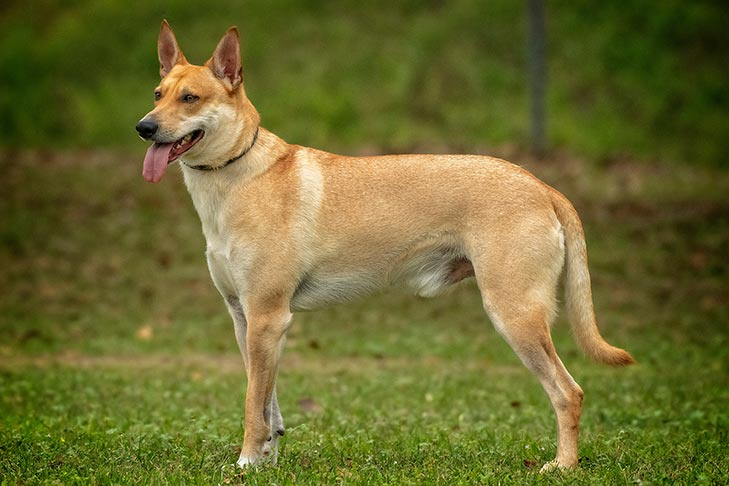

In [31]:
from PIL import Image
import io
Image.open(io.BytesIO(img_bytes))

In [32]:
response=predictor.predict(img_bytes, initial_args={"ContentType": "image/jpeg"})

In [33]:
import json
response2=predictor.predict(json.dumps(request_dict), initial_args={"ContentType": "application/json"})

In [34]:
type(response2[0][0])

float

In [35]:
response2[0]

[-14.58630084991455,
 -6.2159881591796875,
 -5.063845157623291,
 -5.483874320983887,
 -9.987054824829102,
 -9.384981155395508,
 -4.574216365814209,
 -4.461605072021484,
 -10.84284496307373,
 -2.6497609615325928,
 -4.836318016052246,
 -6.480144500732422,
 -6.812169551849365,
 -0.5165103673934937,
 -10.395747184753418,
 -7.505365371704102,
 -13.17343521118164,
 -5.179255962371826,
 -8.45449447631836,
 -0.49176865816116333,
 -6.7832255363464355,
 -7.038589954376221,
 -14.925151824951172,
 -8.176274299621582,
 -8.268387794494629,
 -15.081367492675781,
 -6.03702974319458,
 -8.311685562133789,
 -9.861600875854492,
 -5.530261993408203,
 -4.421384334564209,
 -7.501176834106445,
 -11.513505935668945,
 -8.323691368103027,
 -10.40020751953125,
 -12.371358871459961,
 -7.138741970062256,
 -8.790632247924805,
 -0.9835120439529419,
 -10.025473594665527,
 -6.532810688018799,
 -8.520153999328613,
 -3.5587453842163086,
 -8.520532608032227,
 -4.566716194152832,
 -15.233667373657227,
 -5.679412364959717,


In [37]:
# import torch
import numpy as np
np.argmax(response, 1)

array([119])